# NEO

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Append the directory, not the file
sys.path.append('/Volumes/Maestria/GitHub/NEO/NEO/API_test')

import dataprocess as dp


## 5 features

#### SMOTE

In [2]:
# 5 feature Columns

df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/CSV/nearest-earth-objects(1910-2024).csv')
df = dp.OverallProcessor(df).clean3()
df = dp.OverallProcessor(df).smote()
df.shape

(590018, 6)

In [3]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(472014, 5)

##### 20,000 samples

In [4]:
X_train_sample, y_train_sample = spt.sample(20000)

X_train_sample.shape

(20000, 5)

The accuracy score is 0.81287922443307
 The recall score is 0.7537320620244631
 The f1 score is 0.8322686011622166
 The ROC AUC score is 0.8129540119238619

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.70      0.79     59040
           1       0.75      0.93      0.83     58964

    accuracy                           0.81    118004
   macro avg       0.83      0.81      0.81    118004
weighted avg       0.83      0.81      0.81    118004


Cross validation score: [0.229      0.3        0.27       0.23599981 0.26499982]

Mean cross validation score: 0.2599999250499813



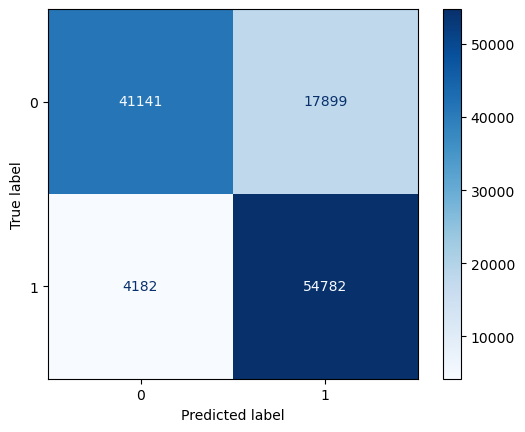

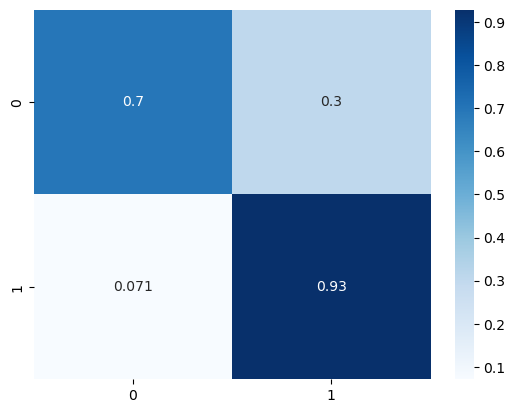

In [130]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.8824361886037762
 The recall score is 0.876391926409456
 The f1 score is 0.8832857996180477
 The ROC AUC score is 0.8824412429135485

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     59040
           1       0.88      0.89      0.88     58964

    accuracy                           0.88    118004
   macro avg       0.88      0.88      0.88    118004
weighted avg       0.88      0.88      0.88    118004


Cross validation score: [0.511      0.556      0.537      0.51699988 0.51099988]

Mean cross validation score: 0.526399951399988



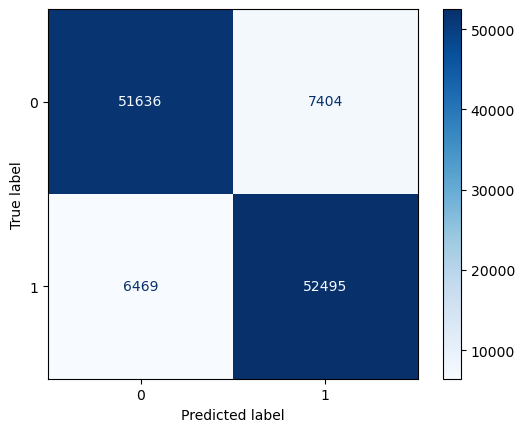

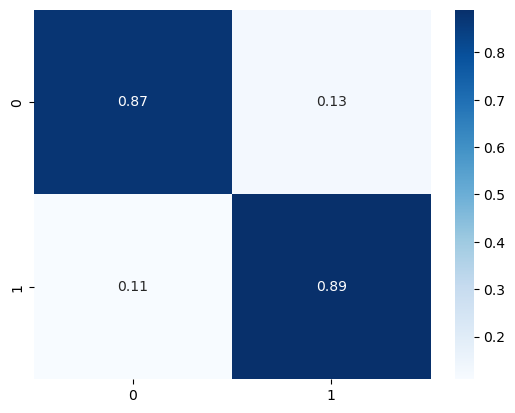

In [131]:
svm = dp.supportvm(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.8924104267651944
 The recall score is 0.8699072593540135
 The f1 score is 0.8955096128522517
 The ROC AUC score is 0.8924298993515679

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89     59040
           1       0.87      0.92      0.90     58964

    accuracy                           0.89    118004
   macro avg       0.89      0.89      0.89    118004
weighted avg       0.89      0.89      0.89    118004


Cross validation score: [0.555      0.551      0.527      0.50499988 0.51599988]

Mean cross validation score: 0.5307999510499878



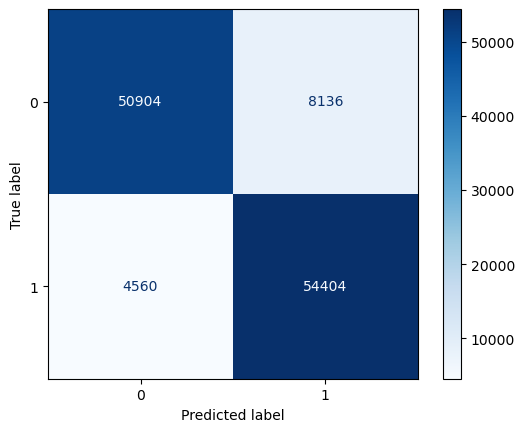

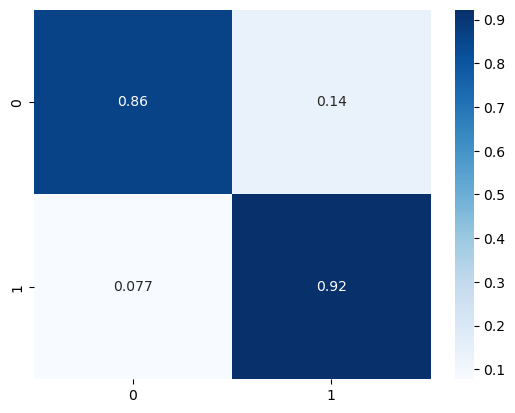

In [132]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

The accuracy score is 0.8440137622453476
 The recall score is 0.766384236453202
 The f1 score is 0.8637416814100334
 The ROC AUC score is 0.8441073594305578

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.70      0.82     59040
           1       0.77      0.99      0.86     58964

    accuracy                           0.84    118004
   macro avg       0.88      0.84      0.84    118004
weighted avg       0.88      0.84      0.84    118004


Cross validation score: [0.363      0.407      0.381      0.39299985 0.38399985]

Mean cross validation score: 0.3855999388499848



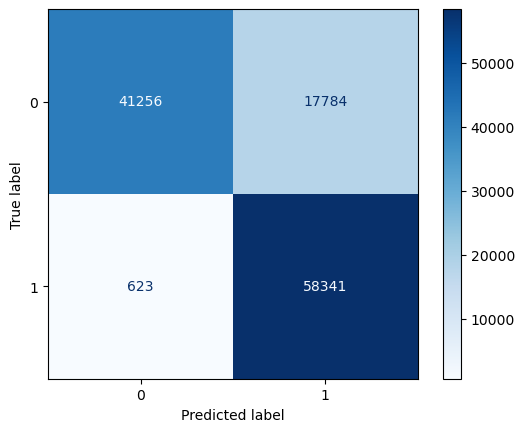

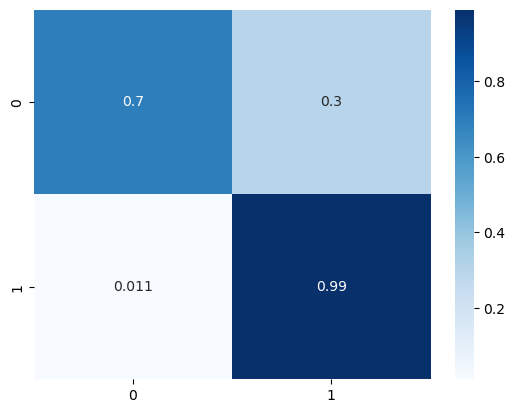

In [6]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

The accuracy score is 0.8591234195451002
 The recall score is 0.792435628246215
 The f1 score is 0.8734431620938519
 The ROC AUC score is 0.8591966489037729

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.75      0.84     59040
           1       0.79      0.97      0.87     58964

    accuracy                           0.86    118004
   macro avg       0.88      0.86      0.86    118004
weighted avg       0.88      0.86      0.86    118004


Cross validation score: [0.46       0.48       0.431      0.44799986 0.41999985]

Mean cross validation score: 0.44779994339998586



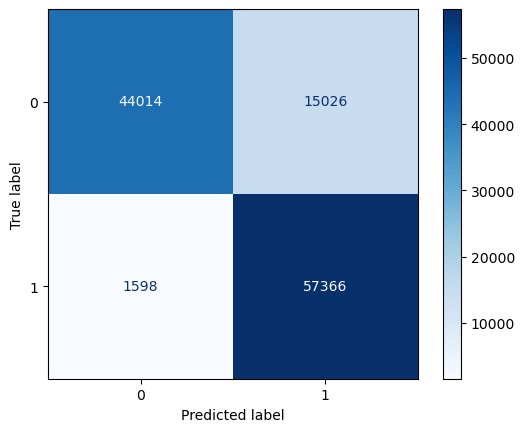

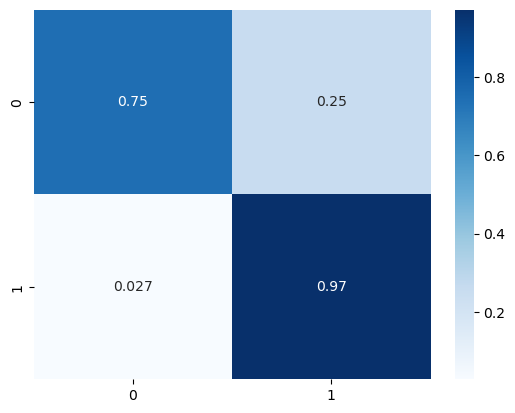

In [7]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


The accuracy score is 0.8929273583946307
 The recall score is 0.8700458473777536
 The f1 score is 0.8960621241660702
 The ROC AUC score is 0.8929471532076253

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89     59040
           1       0.87      0.92      0.90     58964

    accuracy                           0.89    118004
   macro avg       0.89      0.89      0.89    118004
weighted avg       0.89      0.89      0.89    118004




/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Cross validation score: [0.574      0.567      0.53       0.49999987 0.52999988]

Mean cross validation score: 0.5401999514999879



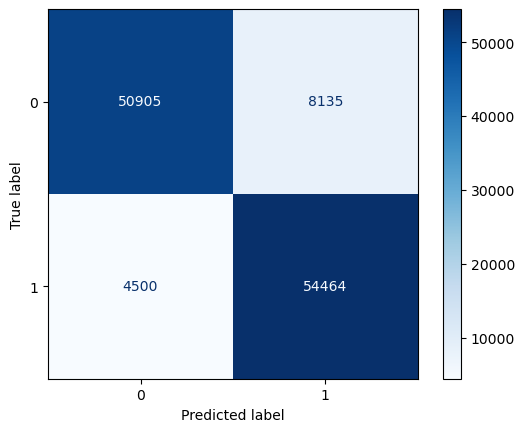

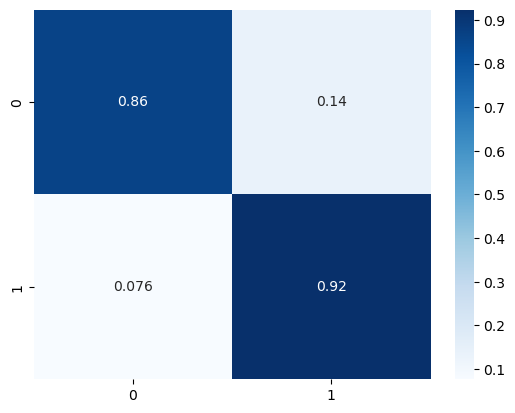

In [8]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
The accuracy score is 0.8441917223144978
 The recall score is 0.7658342286627708
 The f1 score is 0.8640953239803084
 The ROC AUC score is 0.8442863947668037

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.70      0.82     59040
           1       0.77      0.99      0.86     58964

    accuracy                           0.84    118004
   macro avg       0.88      0.84      0.84    118004
weighted avg       0.88      0.84      0.84    118004


[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
Cross validation score: [0.363      0.41       0.381      0.38999985 0.38399985]

Mean cross validation score: 0.385

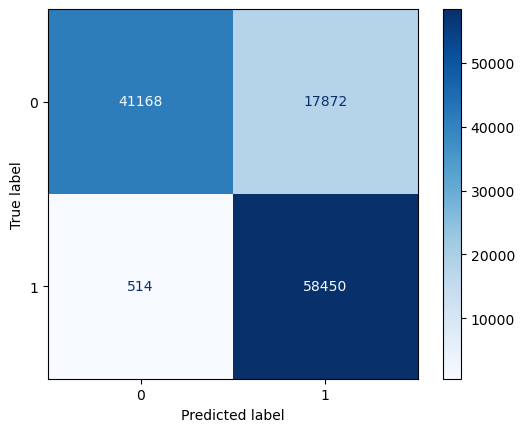

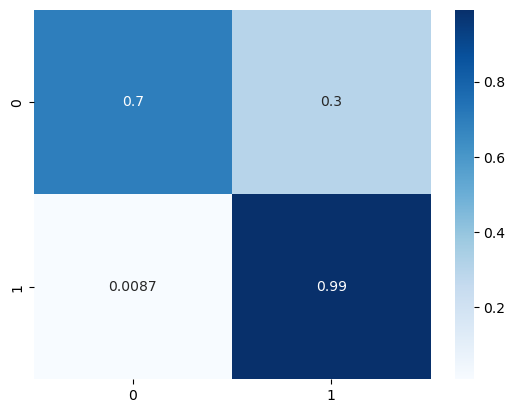

In [9]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

##### 4000 samples

In [133]:
X_train_sample, y_train_sample = spt.sample(4000)

X_train_sample.shape

(4000, 5)

The accuracy score is 0.7881597233992068
 The recall score is 0.7577242928250577
 The f1 score is 0.7997917667787923
 The ROC AUC score is 0.7881974692334435

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.73      0.78     59040
           1       0.76      0.85      0.80     58964

    accuracy                           0.79    118004
   macro avg       0.79      0.79      0.79    118004
weighted avg       0.79      0.79      0.79    118004


Cross validation score: [0.145 0.215 0.15  0.115 0.11 ]

Mean cross validation score: 0.147



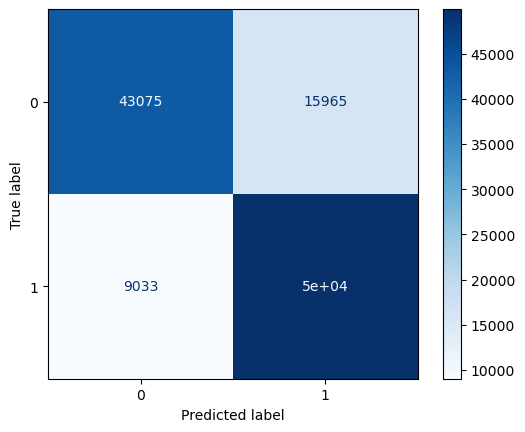

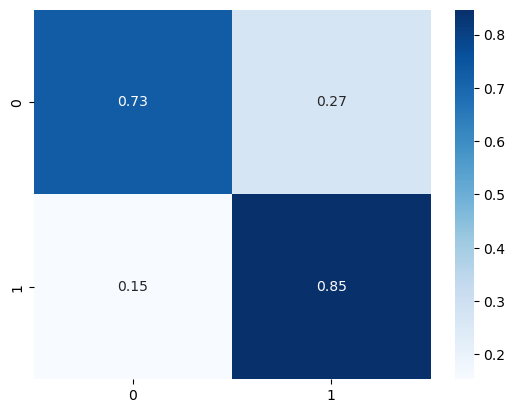

In [134]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.8587590251177926
 The recall score is 0.8347393912534228
 The f1 score is 0.8635451888360365
 The ROC AUC score is 0.8587819713015832

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85     59040
           1       0.83      0.89      0.86     58964

    accuracy                           0.86    118004
   macro avg       0.86      0.86      0.86    118004
weighted avg       0.86      0.86      0.86    118004


Cross validation score: [0.435 0.505 0.4   0.375 0.42 ]

Mean cross validation score: 0.42700000000000005



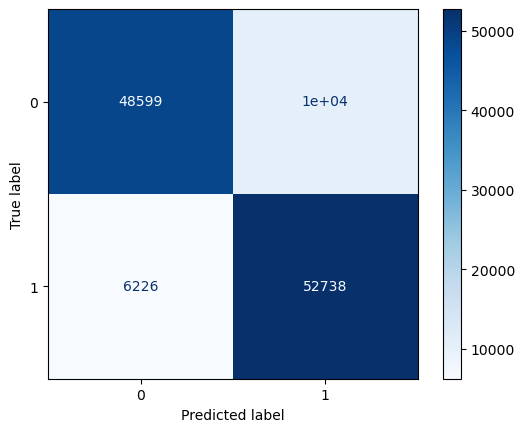

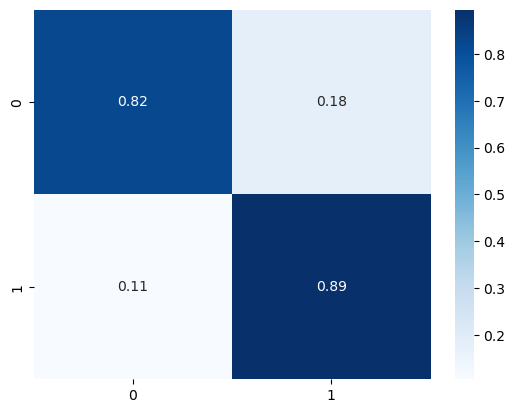

In [135]:
svm = dp.supportvm(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.8504287990237619
 The recall score is 0.8102490162506383
 The f1 score is 0.8594140793016105
 The ROC AUC score is 0.8504703147609795

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84     59040
           1       0.81      0.91      0.86     58964

    accuracy                           0.85    118004
   macro avg       0.86      0.85      0.85    118004
weighted avg       0.86      0.85      0.85    118004


Cross validation score: [0.475 0.495 0.37  0.435 0.405]

Mean cross validation score: 0.43599999999999994



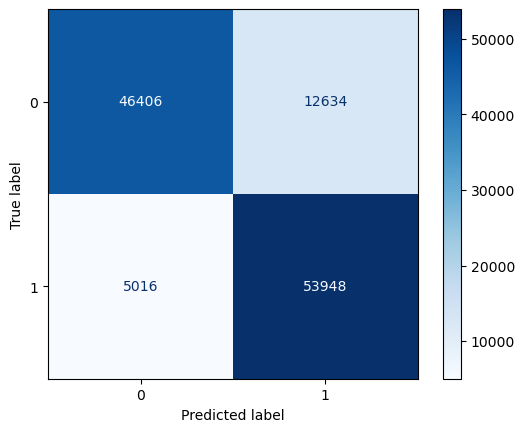

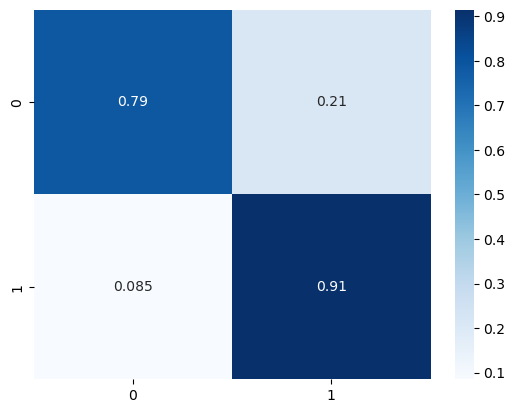

In [136]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

#### ADASYN

In [137]:
df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/CSV/nearest-earth-objects(1910-2024).csv')
df = dp.OverallProcessor(df).clean3()
df = dp.OverallProcessor(df).adasyn()
df.shape

(588912, 6)

In [138]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(471129, 5)

##### 20,000 samples

In [139]:
X_train_sample, y_train_sample = spt.sample(20000)

X_train_sample.shape

(20000, 5)

The accuracy score is 0.8162043758437126
 The recall score is 0.7545155432987016
 The f1 score is 0.8362233318202451
 The ROC AUC score is 0.8161186450791629

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.69      0.79     58850
           1       0.75      0.94      0.84     58933

    accuracy                           0.82    117783
   macro avg       0.84      0.82      0.81    117783
weighted avg       0.84      0.82      0.81    117783


Cross validation score: [0.27599547 0.25299533 0.30599566 0.23999525 0.23999525]

Mean cross validation score: 0.26299539372121056



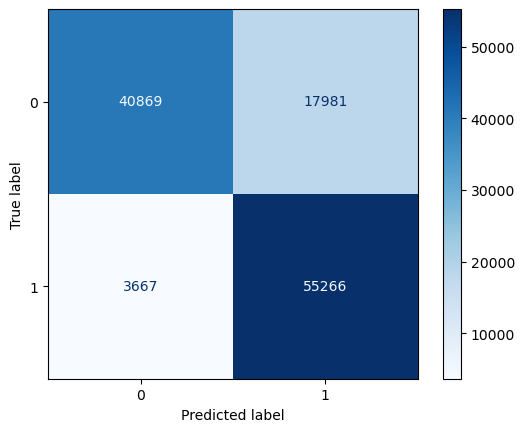

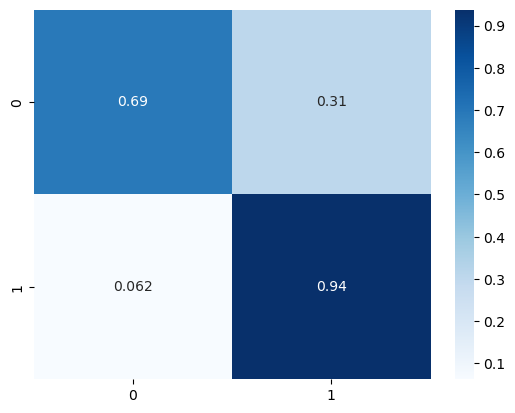

In [140]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.8811713065552754
 The recall score is 0.8780348279633213
 The f1 score is 0.8817585834009192
 The ROC AUC score is 0.881168244121988

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     58850
           1       0.88      0.89      0.88     58933

    accuracy                           0.88    117783
   macro avg       0.88      0.88      0.88    117783
weighted avg       0.88      0.88      0.88    117783


Cross validation score: [0.51099694 0.48499678 0.50799692 0.52099701 0.51299696]

Mean cross validation score: 0.5075969224807654



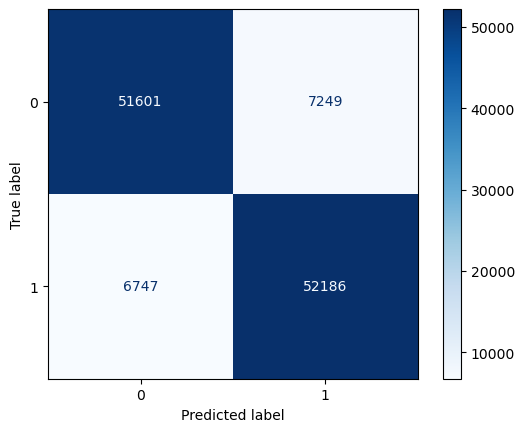

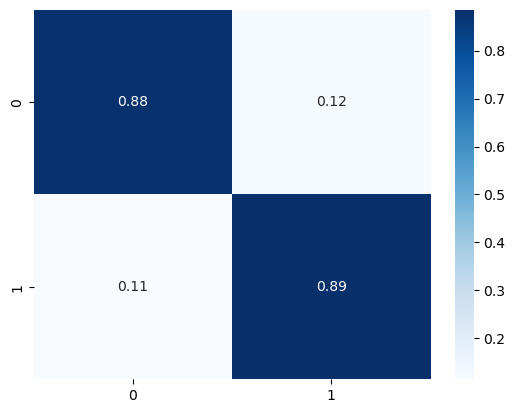

In [141]:
svm = dp.supportvm(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.8926924938233871
 The recall score is 0.8695242656449553
 The f1 score is 0.8960377715446687
 The ROC AUC score is 0.8926702618576361

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89     58850
           1       0.87      0.92      0.90     58933

    accuracy                           0.89    117783
   macro avg       0.89      0.89      0.89    117783
weighted avg       0.89      0.89      0.89    117783


Cross validation score: [0.56499728 0.53799711 0.53899712 0.53899712 0.52499703]

Mean cross validation score: 0.5411971324820779



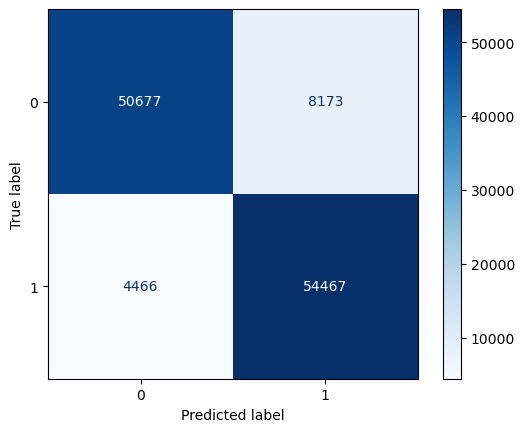

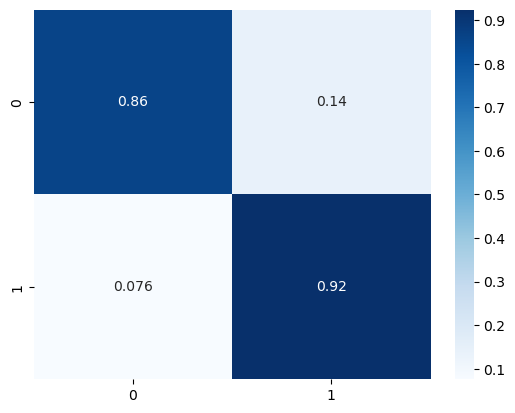

In [142]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

##### 4000 samples

In [143]:
X_train_sample, y_train_sample = spt.sample(4000)

X_train_sample.shape

(4000, 5)

The accuracy score is 0.7929921975157705
 The recall score is 0.757754800590842
 The f1 score is 0.8064244656864302
 The ROC AUC score is 0.7929436929089917

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.72      0.78     58850
           1       0.76      0.86      0.81     58933

    accuracy                           0.79    117783
   macro avg       0.80      0.79      0.79    117783
weighted avg       0.80      0.79      0.79    117783


Cross validation score: [0.02499391 0.13999462 0.17999487 0.12999456 0.20999506]

Mean cross validation score: 0.1369946062162887



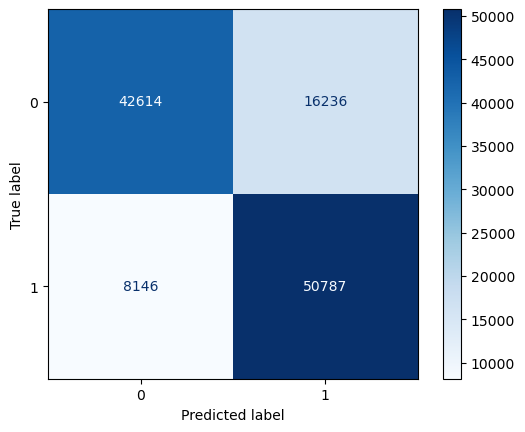

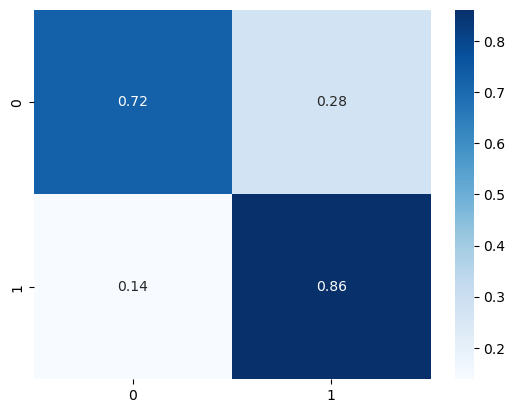

In [144]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.8636560454394947
 The recall score is 0.8320477075588599
 The f1 score is 0.869960240661414
 The ROC AUC score is 0.8636223118513064

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.82      0.86     58850
           1       0.83      0.91      0.87     58933

    accuracy                           0.86    117783
   macro avg       0.87      0.86      0.86    117783
weighted avg       0.87      0.86      0.86    117783


Cross validation score: [0.39999625 0.36499603 0.49999687 0.44499653 0.38999619]

Mean cross validation score: 0.4199963749773435



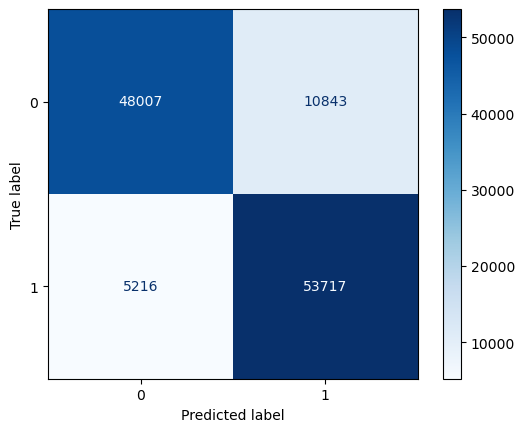

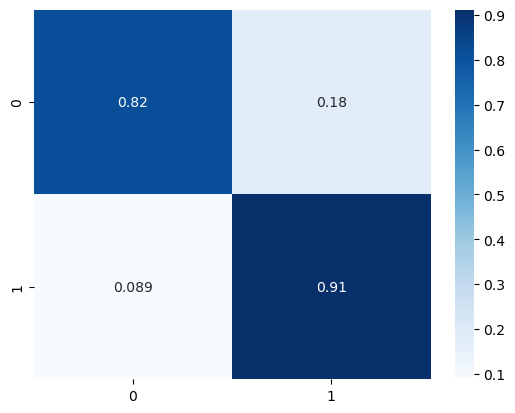

In [145]:
svm = dp.supportvm(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.8521773091193127
 The recall score is 0.8046994246800516
 The f1 score is 0.8629799557720609
 The ROC AUC score is 0.852122174914557

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.77      0.84     58850
           1       0.80      0.93      0.86     58933

    accuracy                           0.85    117783
   macro avg       0.86      0.85      0.85    117783
weighted avg       0.86      0.85      0.85    117783


Cross validation score: [0.34999594 0.39499622 0.44999656 0.4399965  0.42499641]

Mean cross validation score: 0.411996324977031



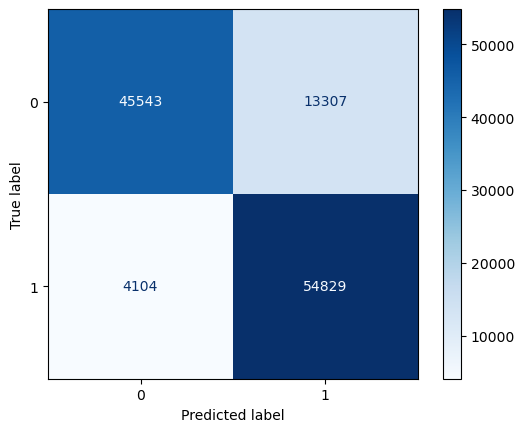

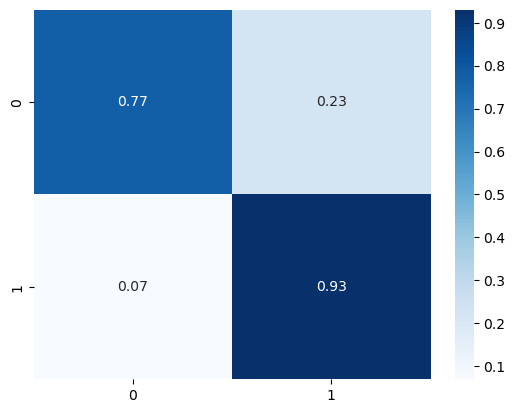

In [146]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

#### Random Under Sample

In [147]:
df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/CSV/nearest-earth-objects(1910-2024).csv')
df = dp.OverallProcessor(df).clean3()
df = dp.OverallProcessor(df).rus()
df.shape

(86324, 6)

In [148]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(69059, 5)

##### 20,000 samples

In [149]:
X_train_sample, y_train_sample = spt.sample(20000)

X_train_sample.shape

(20000, 5)

The accuracy score is 0.7968143643208804
 The recall score is 0.7472878729174739
 The f1 score is 0.8147639666279438
 The ROC AUC score is 0.7970256904099231

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.70      0.78      8651
           1       0.75      0.90      0.81      8614

    accuracy                           0.80     17265
   macro avg       0.81      0.80      0.79     17265
weighted avg       0.81      0.80      0.79     17265


Cross validation score: [0.16599979 0.22599981 0.16799979 0.17799979 0.1899998 ]

Mean cross validation score: 0.18559979639994922



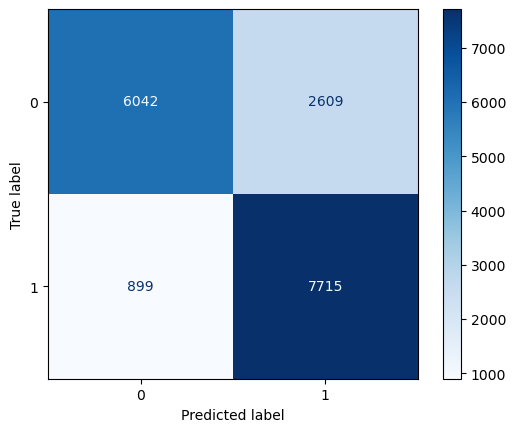

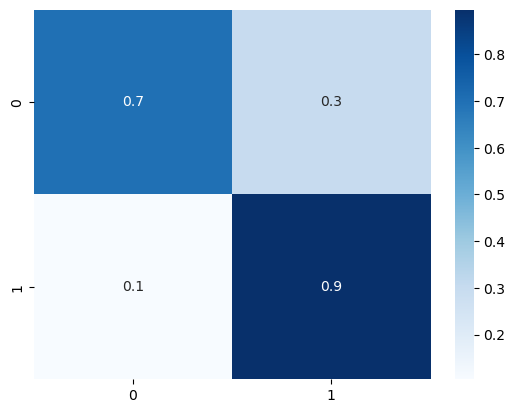

In [150]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.8317984361424848
 The recall score is 0.75432032781044
 The f1 score is 0.8536290322580645
 The ROC AUC score is 0.8321218865654799

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.68      0.80      8651
           1       0.75      0.98      0.85      8614

    accuracy                           0.83     17265
   macro avg       0.87      0.83      0.83     17265
weighted avg       0.87      0.83      0.83     17265


Cross validation score: [0.33899983 0.35399984 0.33199983 0.30199983 0.37299984]

Mean cross validation score: 0.33999983499995884



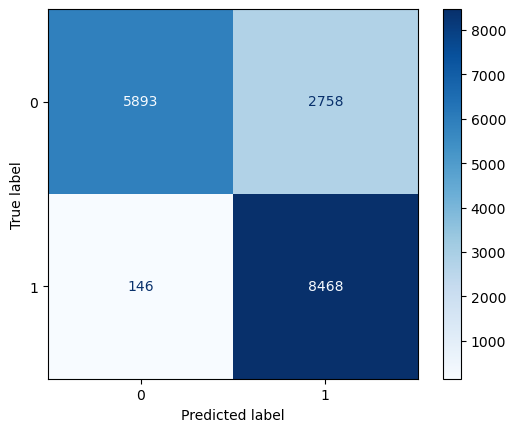

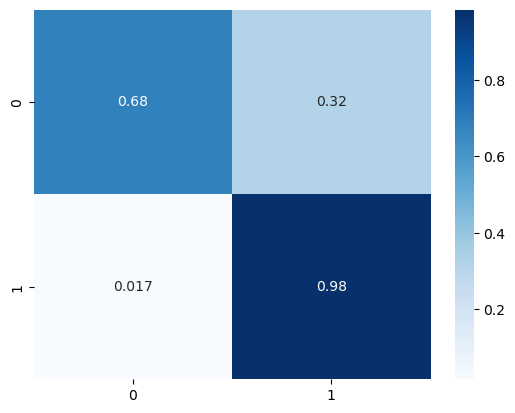

In [151]:
svm = dp.supportvm(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.8470315667535476
 The recall score is 0.8010281221651043
 The f1 score is 0.8575128135958997
 The ROC AUC score is 0.8471930998017517

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.77      0.83      8651
           1       0.80      0.92      0.86      8614

    accuracy                           0.85     17265
   macro avg       0.86      0.85      0.85     17265
weighted avg       0.86      0.85      0.85     17265


Cross validation score: [0.36799984 0.38099985 0.39099985 0.38099985 0.39499985]

Mean cross validation score: 0.3831998457999616



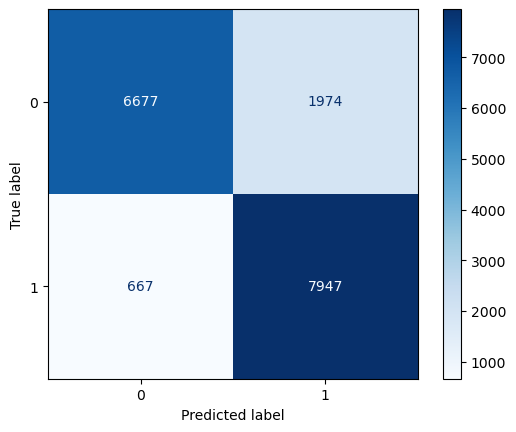

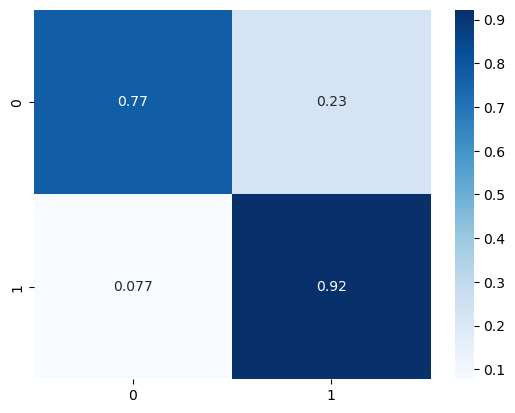

In [152]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

##### 4000 samples

In [153]:
X_train_sample, y_train_sample = spt.sample(4000)

X_train_sample.shape

(4000, 5)

The accuracy score is 0.7713292788879236
 The recall score is 0.7516720604099245
 The f1 score is 0.7792440169984344
 The ROC AUC score is 0.7714096567788761

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      8651
           1       0.75      0.81      0.78      8614

    accuracy                           0.77     17265
   macro avg       0.77      0.77      0.77     17265
weighted avg       0.77      0.77      0.77     17265


Cross validation score: [0.11       0.08       0.02       0.08       0.11499447]

Mean cross validation score: 0.08099889374308586



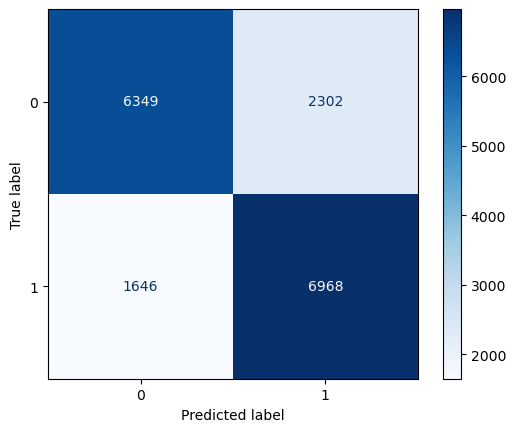

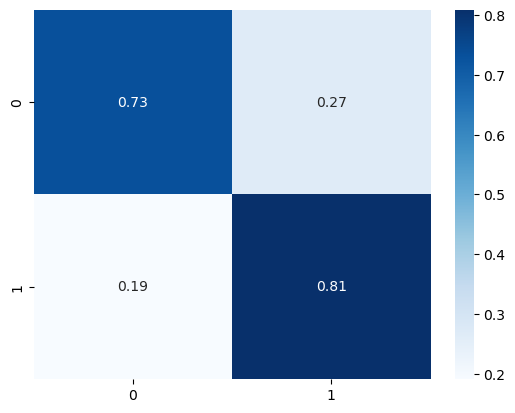

In [154]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.8240949898638865
 The recall score is 0.7528792962727849
 The f1 score is 0.8453744717682399
 The ROC AUC score is 0.824393703389683

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.69      0.80      8651
           1       0.75      0.96      0.85      8614

    accuracy                           0.82     17265
   macro avg       0.85      0.82      0.82     17265
weighted avg       0.85      0.82      0.82     17265


Cross validation score: [0.32       0.34       0.24       0.315      0.32499578]

Mean cross validation score: 0.3079991562447265



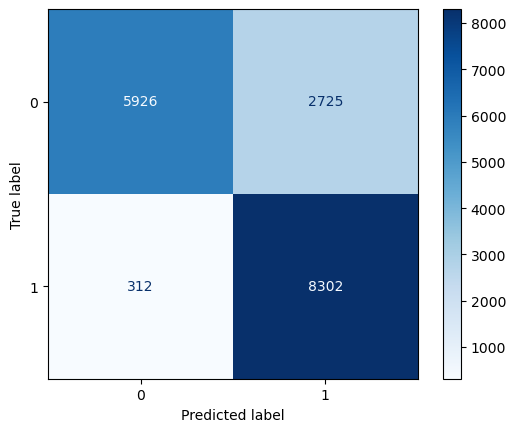

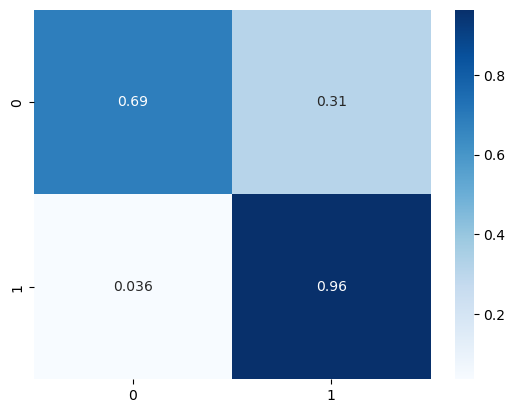

In [155]:
svm = dp.supportvm(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.8256588473790907
 The recall score is 0.7738467552775606
 The f1 score is 0.8402844104849836
 The ROC AUC score is 0.8258588861465572

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      8651
           1       0.77      0.92      0.84      8614

    accuracy                           0.83     17265
   macro avg       0.84      0.83      0.82     17265
weighted avg       0.84      0.83      0.82     17265


Cross validation score: [0.28       0.4        0.2        0.35       0.35499597]

Mean cross validation score: 0.3169991937449609



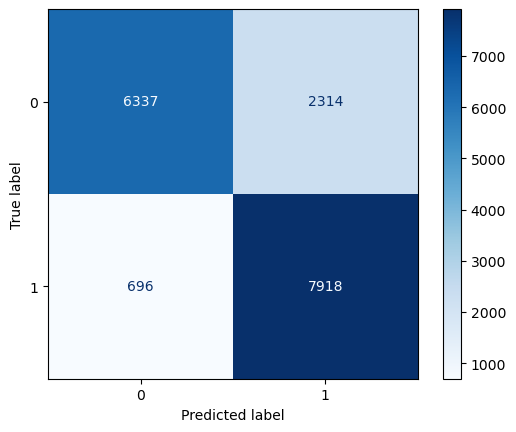

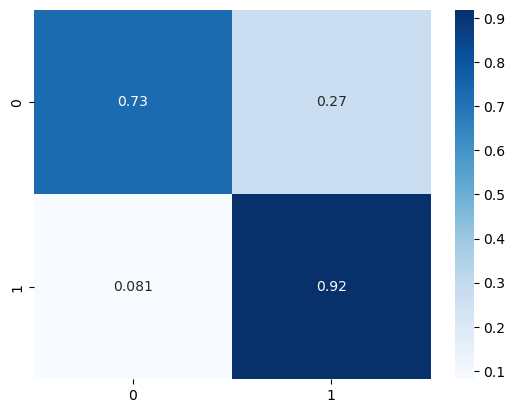

In [156]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

#### Imbalanced

In [157]:
df = pd.read_csv('/Volumes/Maestria/GitHub/NEO/NEO/API_test/CSV/nearest-earth-objects(1910-2024).csv')
df = dp.OverallProcessor(df).clean3()
df.shape

(338171, 6)

In [158]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(270536, 5)

##### 20,000 samples

In [159]:
X_train_sample, y_train_sample = spt.sample(20000)

X_train_sample.shape

(20000, 5)

The accuracy score is 0.6246174318030605
 The recall score is 0.24916597164303586
 The f1 score is 0.39720791091906266
 The ROC AUC score is 0.7760524884052503

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.57      0.73     59088
           1       0.25      0.98      0.40      8547

    accuracy                           0.62     67635
   macro avg       0.62      0.78      0.56     67635
weighted avg       0.90      0.62      0.69     67635


Cross validation score: [-2.25092168 -2.2925387  -2.42468822 -2.31045728 -2.32613604]

Mean cross validation score: -2.3209483848475494



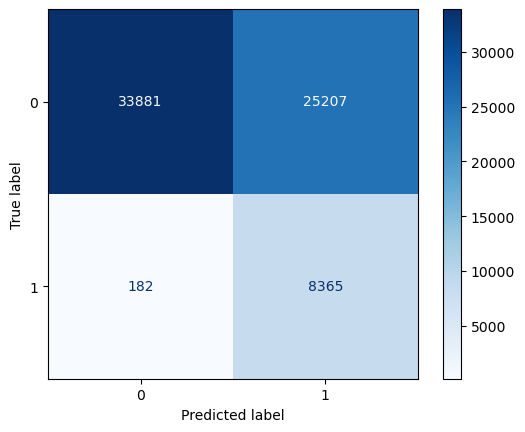

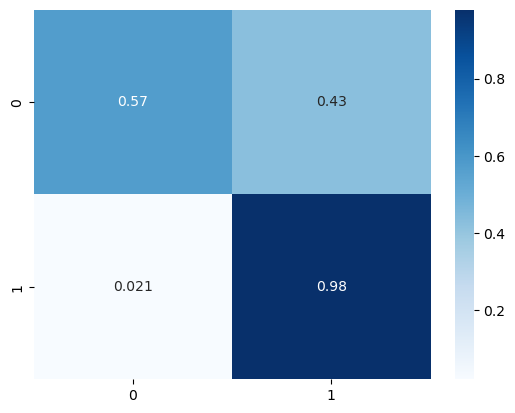

In [160]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.8836105566644489
 The recall score is 0.6965637740244612
 The f1 score is 0.23304754481683554
 The ROC AUC score is 0.5655573913849706

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     59088
           1       0.70      0.14      0.23      8547

    accuracy                           0.88     67635
   macro avg       0.79      0.57      0.59     67635
weighted avg       0.86      0.88      0.85     67635


Cross validation score: [-0.05896138 -0.05047663 -0.0370377  -0.01239966 -0.0168793 ]

Mean cross validation score: -0.035150933559916143



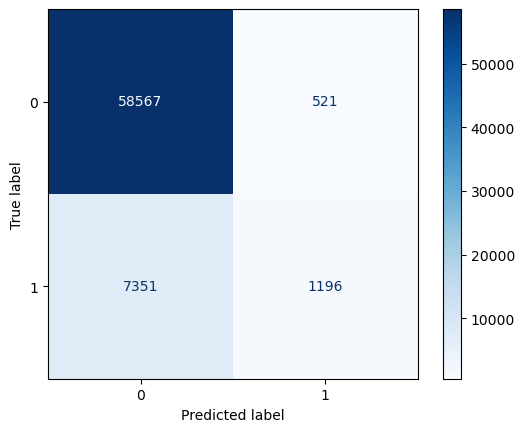

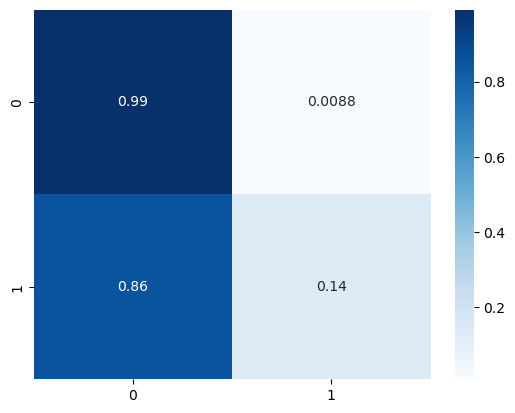

In [161]:
svm = dp.supportvm(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.8867745989502477
 The recall score is 0.58970736629667
 The f1 score is 0.43282476670122944
 The ROC AUC score is 0.6537340163203282

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     59088
           1       0.59      0.34      0.43      8547

    accuracy                           0.89     67635
   macro avg       0.75      0.65      0.68     67635
weighted avg       0.87      0.89      0.87     67635


Cross validation score: [-0.09037125 -0.0370377  -0.03255806 -0.01015983 -0.01911912]

Mean cross validation score: -0.03784919223104879



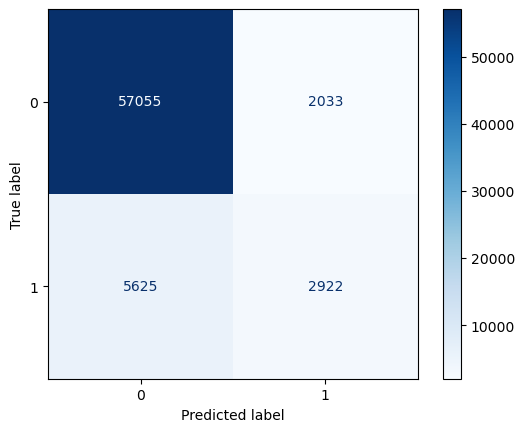

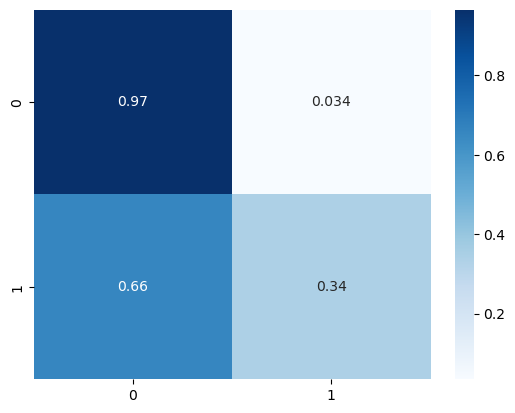

In [162]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

##### 4000 samples

In [163]:
X_train_sample, y_train_sample = spt.sample(4000)

X_train_sample.shape

(4000, 5)

The accuracy score is 0.6597471723220226
 The recall score is 0.26833642944077896
 The f1 score is 0.4213331992255274
 The ROC AUC score is 0.796808588949125

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.61      0.76     59088
           1       0.27      0.98      0.42      8547

    accuracy                           0.66     67635
   macro avg       0.63      0.80      0.59     67635
weighted avg       0.90      0.66      0.72     67635


Cross validation score: [-2.02264172 -1.97769538 -1.78667341 -2.23160285 -1.87501219]

Mean cross validation score: -1.9787251083038098



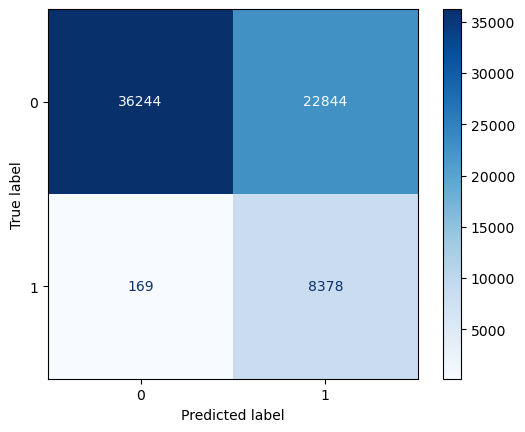

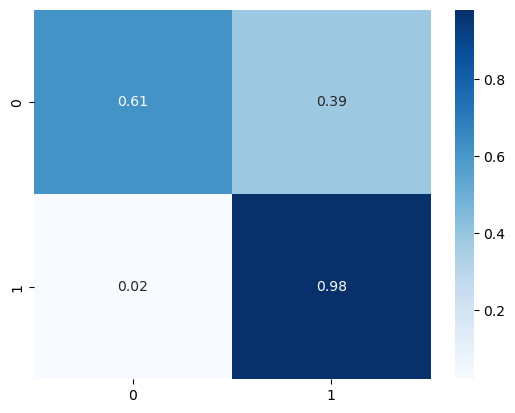

In [164]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.8781400162637688
 The recall score is 0.5656478691347395
 The f1 score is 0.24176632934682613
 The ROC AUC score is 0.5683309642235312

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     59088
           1       0.57      0.15      0.24      8547

    accuracy                           0.88     67635
   macro avg       0.73      0.57      0.59     67635
weighted avg       0.85      0.88      0.85     67635


Cross validation score: [-0.02252936 -0.05623911  0.05612675 -0.13663273 -0.02519814]

Mean cross validation score: -0.036894518321961736



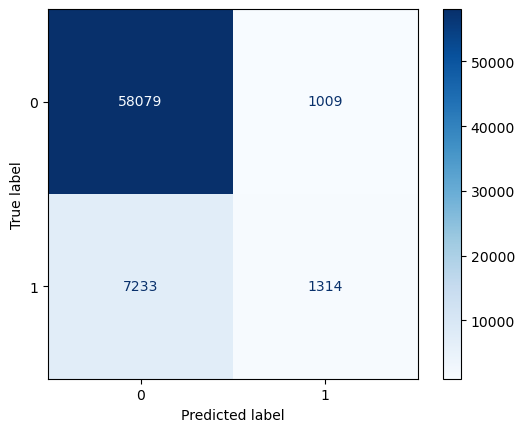

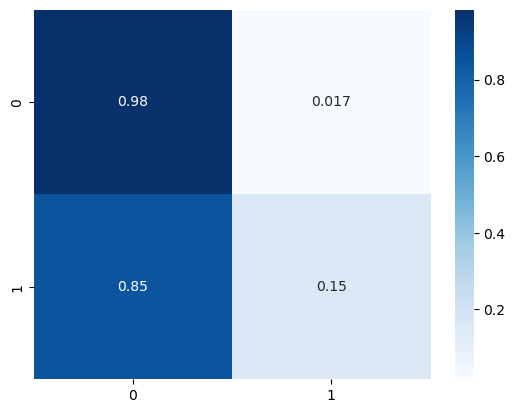

In [165]:
svm = dp.supportvm(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.8775042507577437
 The recall score is 0.5300045808520385
 The f1 score is 0.35839851312630683
 The ROC AUC score is 0.6180052036063408

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     59088
           1       0.53      0.27      0.36      8547

    accuracy                           0.88     67635
   macro avg       0.72      0.62      0.65     67635
weighted avg       0.85      0.88      0.86     67635


Cross validation score: [-0.03376594 -0.13489522 -0.04500253 -0.20349347 -0.05862852]

Mean cross validation score: -0.09515713639575414



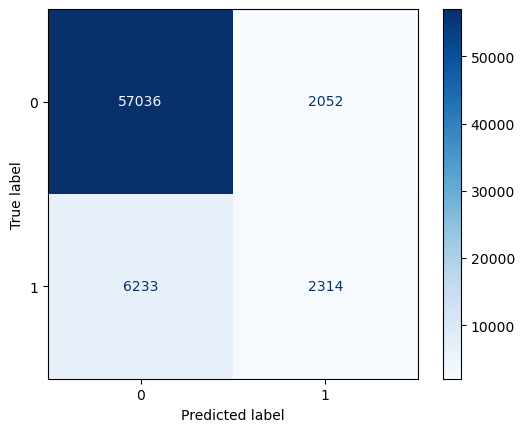

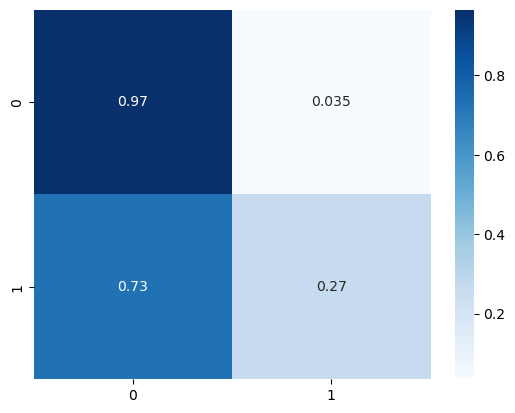

In [166]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

## 11 features

#### SMOTE

In [167]:
# 11 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean()
df = dp.OverallProcessor(df).smote()
df.shape

(1049752, 12)

In [168]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(839801, 11)

##### 20,000 samples

In [169]:
X_train_sample, y_train_sample = spt.sample(20000)

X_train_sample.shape

(20000, 11)

The accuracy score is 0.9318983953398651
 The recall score is 0.8854898894168246
 The f1 score is 0.9357831953002892
 The ROC AUC score is 0.931882611647221

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93    104948
           1       0.89      0.99      0.94    105003

    accuracy                           0.93    209951
   macro avg       0.94      0.93      0.93    209951
weighted avg       0.94      0.93      0.93    209951


Cross validation score: [0.725      0.71       0.699      0.715      0.73399993]

Mean cross validation score: 0.7165999866999967



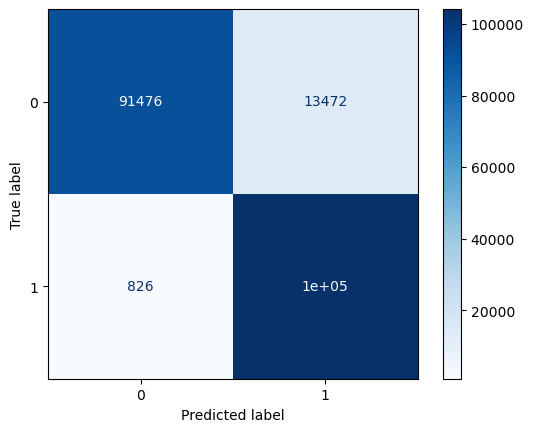

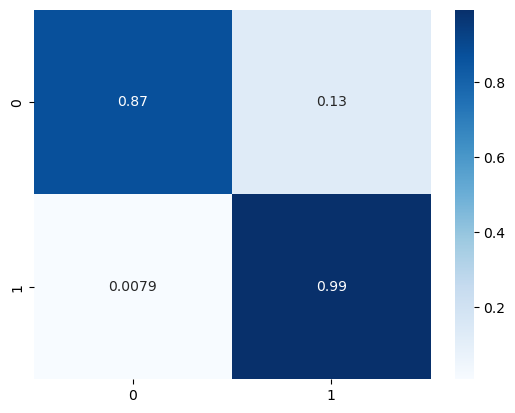

In [170]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9958371239003386
 The recall score is 0.9954984534856055
 The f1 score is 0.9958396405144756
 The ROC AUC score is 0.9958370337768127

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.969 0.981 0.985 0.977 0.985]

Mean cross validation score: 0.9793999992499998



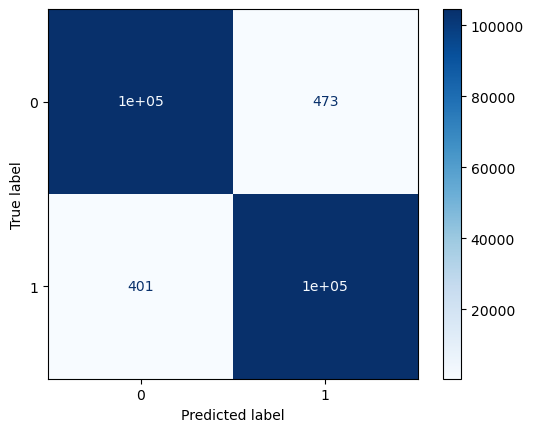

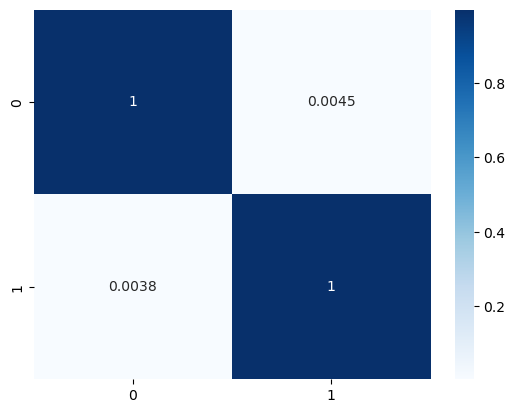

In [171]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9996856409352658
 The recall score is 0.9999142489638416
 The f1 score is 0.9996856514159975
 The ROC AUC score is 0.9996857008055886

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.995 0.998 1.    0.998 1.   ]

Mean cross validation score: 0.9982



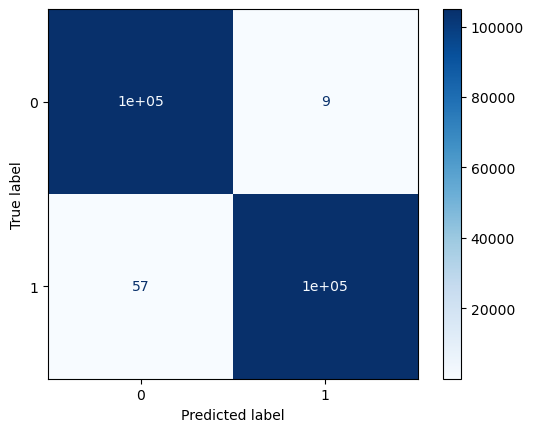

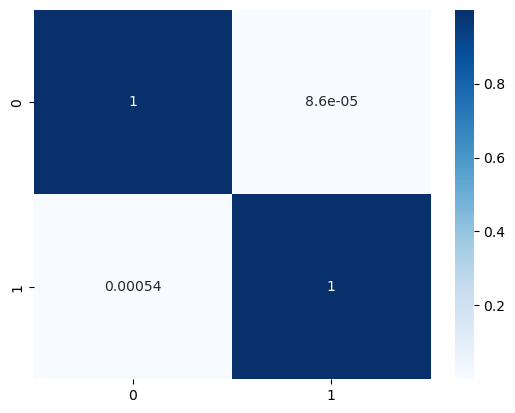

In [172]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

##### 4000 samples

In [173]:
X_train_sample, y_train_sample = spt.sample(4000)

X_train_sample.shape

(4000, 11)

The accuracy score is 0.891312734876233
 The recall score is 0.8690146916196703
 The f1 score is 0.8945317735800221
 The ROC AUC score is 0.8913048004754643

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89    104948
           1       0.87      0.92      0.89    105003

    accuracy                           0.89    209951
   macro avg       0.89      0.89      0.89    209951
weighted avg       0.89      0.89      0.89    209951


Cross validation score: [0.55  0.565 0.505 0.505 0.545]

Mean cross validation score: 0.534



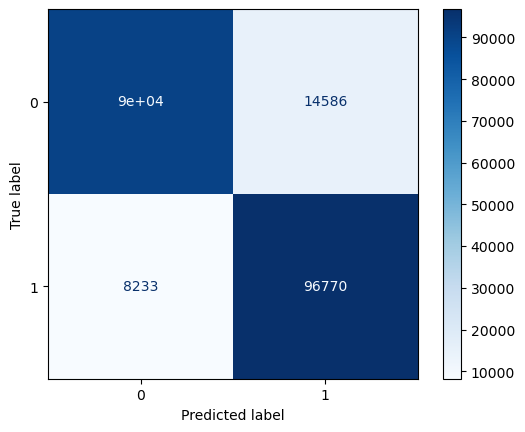

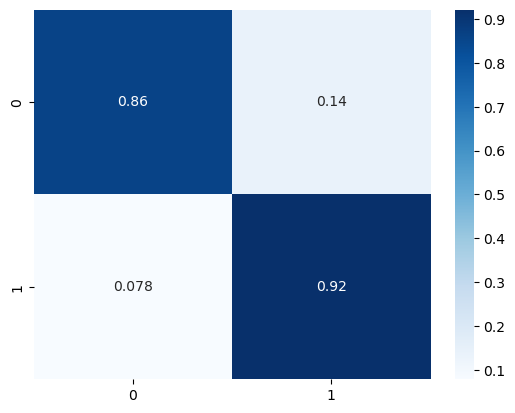

In [174]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9854775638125086
 The recall score is 0.9874170539077888
 The f1 score is 0.985452480807676
 The ROC AUC score is 0.9854780831267362

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99    104948
           1       0.99      0.98      0.99    105003

    accuracy                           0.99    209951
   macro avg       0.99      0.99      0.99    209951
weighted avg       0.99      0.99      0.99    209951


Cross validation score: [0.955 0.94  0.93  0.935 0.93 ]

Mean cross validation score: 0.9380000000000001



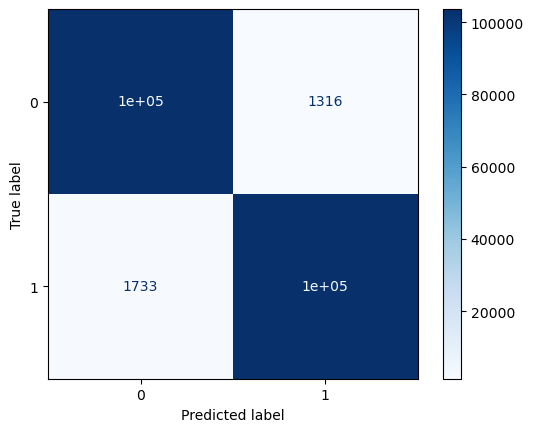

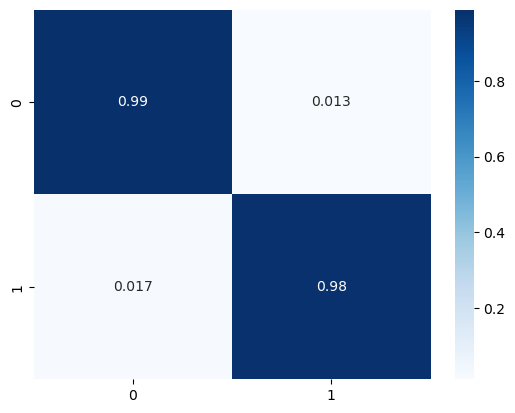

In [175]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9994570161609138
 The recall score is 0.9995332755484012
 The f1 score is 0.9994571170055717
 The ROC AUC score is 0.9994570360876162

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.985 0.985 1.    0.995 0.99 ]

Mean cross validation score: 0.991



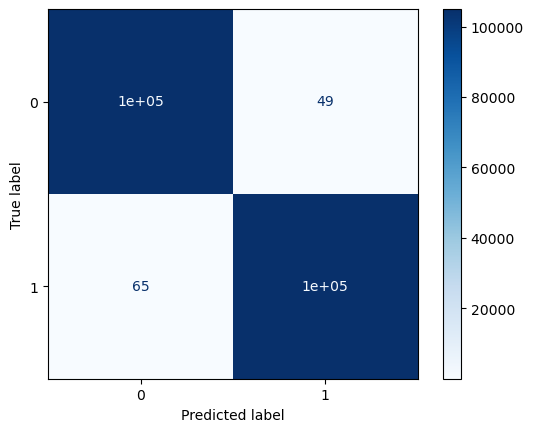

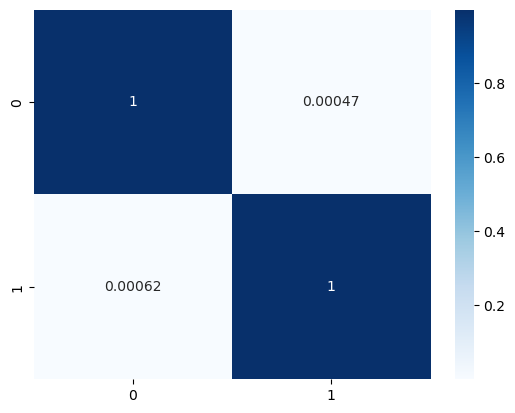

In [176]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

#### ADASYN

In [177]:
# 11 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean()
df = dp.OverallProcessor(df).adasyn()
df.shape

(1048663, 12)

In [178]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(838930, 11)

##### 20,000 samples

In [179]:
X_train_sample, y_train_sample = spt.sample(20000)

X_train_sample.shape

(20000, 11)

The accuracy score is 0.9332150877544306
 The recall score is 0.885501827143707
 The f1 score is 0.9370191680792802
 The ROC AUC score is 0.9332946907271726

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93    105002
           1       0.89      0.99      0.94    104731

    accuracy                           0.93    209733
   macro avg       0.94      0.93      0.93    209733
weighted avg       0.94      0.93      0.93    209733


Cross validation score: [0.72999973 0.71399971 0.72699973 0.72299972 0.72399972]

Mean cross validation score: 0.7235997235997237



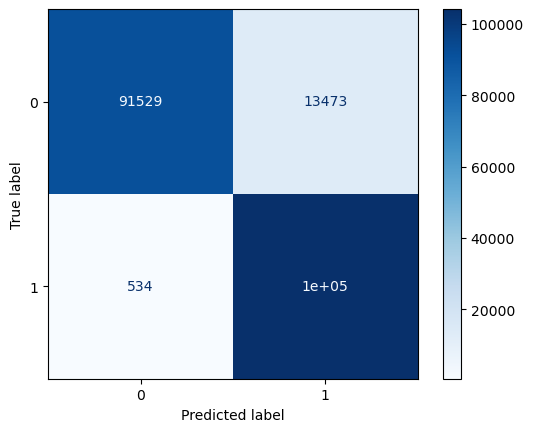

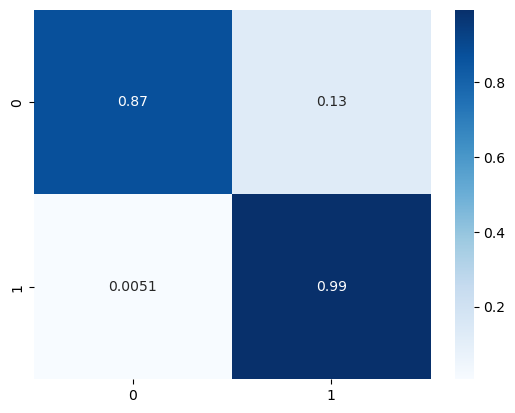

In [180]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.995890012539753
 The recall score is 0.996586443303405
 The f1 score is 0.9958817852604221
 The ROC AUC score is 0.995889093880751

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105002
           1       1.00      1.00      1.00    104731

    accuracy                           1.00    209733
   macro avg       1.00      1.00      1.00    209733
weighted avg       1.00      1.00      1.00    209733


Cross validation score: [0.97899998 0.97899998 0.98099998 0.97899998 0.97399997]

Mean cross validation score: 0.9783999783999784



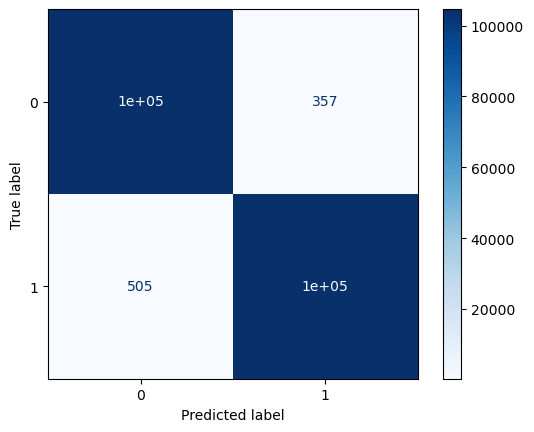

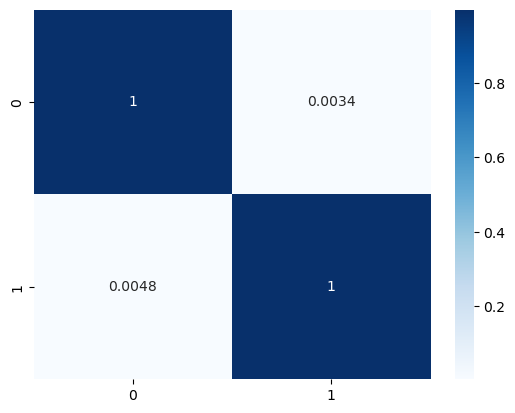

In [181]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9996614743507221
 The recall score is 0.999627642307472
 The f1 score is 0.9996610476967952
 The ROC AUC score is 0.9996615169110655

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105002
           1       1.00      1.00      1.00    104731

    accuracy                           1.00    209733
   macro avg       1.00      1.00      1.00    209733
weighted avg       1.00      1.00      1.00    209733


Cross validation score: [0.997 1.    0.999 0.999 0.997]

Mean cross validation score: 0.9983999983999985



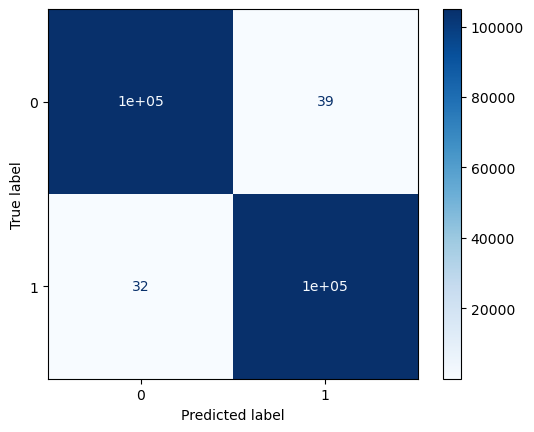

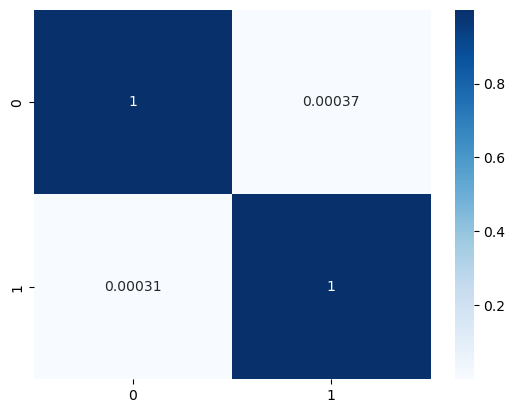

In [182]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

##### 4000 samples

In [183]:
X_train_sample, y_train_sample = spt.sample(4000)

X_train_sample.shape

(4000, 11)

The accuracy score is 0.8943943013259716
 The recall score is 0.867835444616673
 The f1 score is 0.8979238196188677
 The ROC AUC score is 0.8944404726403126

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89    105002
           1       0.87      0.93      0.90    104731

    accuracy                           0.89    209733
   macro avg       0.90      0.89      0.89    209733
weighted avg       0.90      0.89      0.89    209733


Cross validation score: [0.55999725 0.50999694 0.58       0.59       0.565     ]

Mean cross validation score: 0.5609988374927343



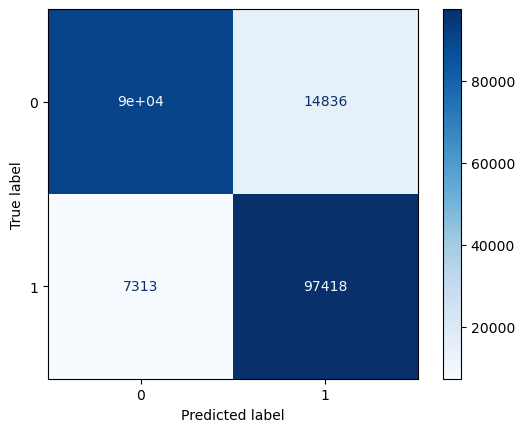

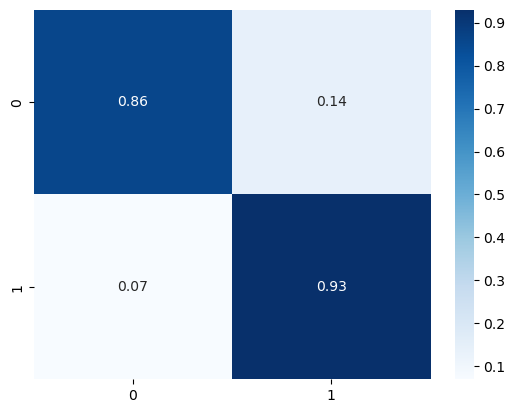

In [184]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9873982635064582
 The recall score is 0.9858279557611406
 The f1 score is 0.9874021077517791
 The ROC AUC score is 0.9874003063319166

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    105002
           1       0.99      0.99      0.99    104731

    accuracy                           0.99    209733
   macro avg       0.99      0.99      0.99    209733
weighted avg       0.99      0.99      0.99    209733


Cross validation score: [0.93499959 0.92499953 0.945      0.935      0.945     ]

Mean cross validation score: 0.9369998249989063



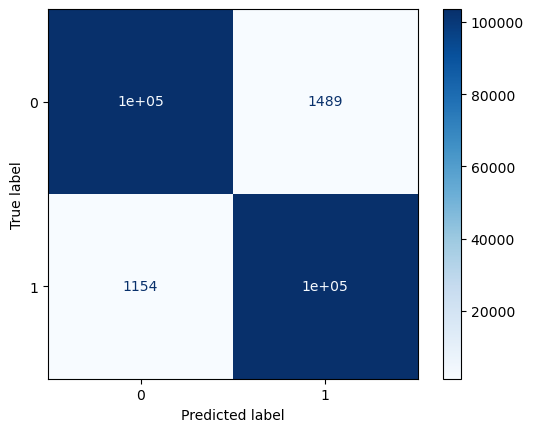

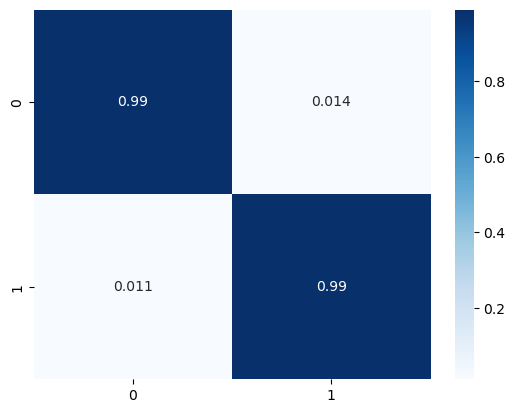

In [185]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9989272074494715
 The recall score is 0.9982550156381113
 The f1 score is 0.9989265420819359
 The ROC AUC score is 0.9989280743298996

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105002
           1       1.00      1.00      1.00    104731

    accuracy                           1.00    209733
   macro avg       1.00      1.00      1.00    209733
weighted avg       1.00      1.00      1.00    209733


Cross validation score: [1.         0.98499991 0.99       1.         0.995     ]

Mean cross validation score: 0.9939999812498828



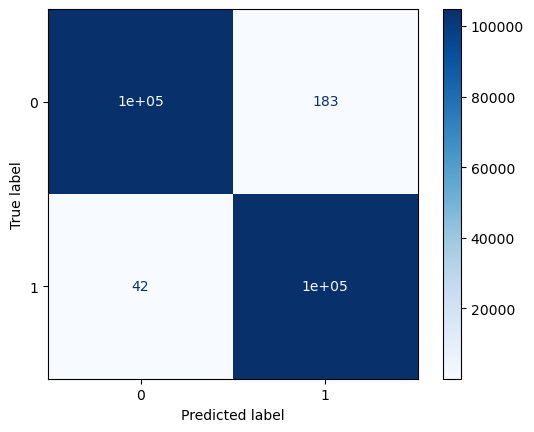

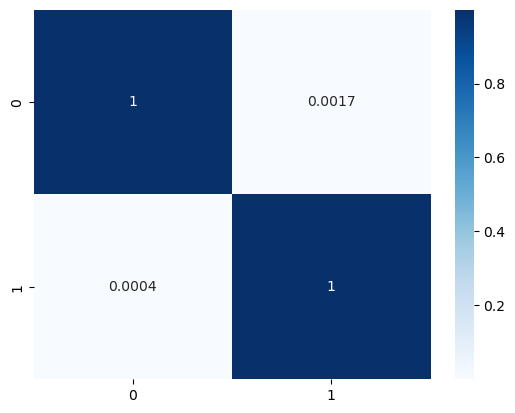

In [186]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

#### Random Under Sample

In [187]:
# 11 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean()
df = dp.OverallProcessor(df).rus()
df.shape

(106502, 12)

In [188]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(85201, 11)

##### 20,000 samples

In [189]:
X_train_sample, y_train_sample = spt.sample(20000)

X_train_sample.shape

(20000, 11)

The accuracy score is 0.9321628092577813
 The recall score is 0.8906129447063866
 The f1 score is 0.9349772757953472
 The ROC AUC score is 0.9326090821184689

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.88      0.93     10743
           1       0.89      0.98      0.93     10558

    accuracy                           0.93     21301
   macro avg       0.94      0.93      0.93     21301
weighted avg       0.94      0.93      0.93     21301


Cross validation score: [0.68199801 0.71599822 0.67899872 0.67199869 0.70899884]

Mean cross validation score: 0.6915984954922888



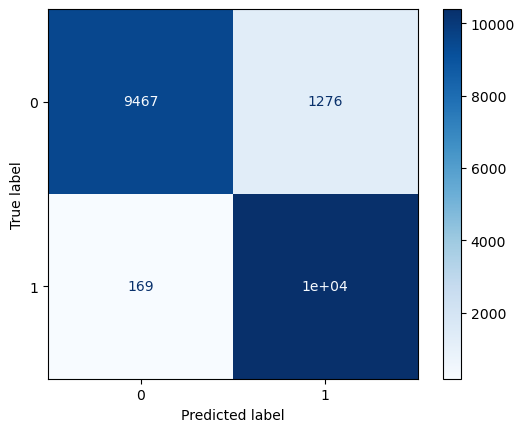

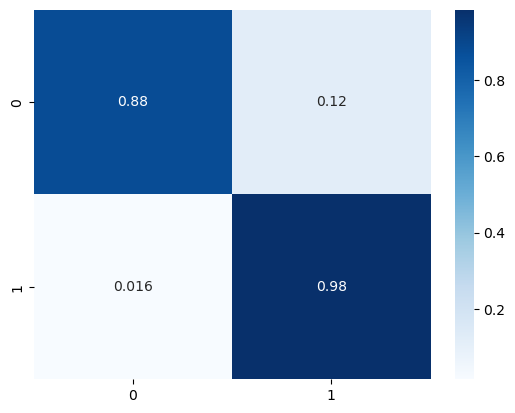

In [190]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.996150415473452
 The recall score is 0.994430809892392
 The f1 score is 0.9961232980332829
 The ROC AUC score is 0.9961648044338602

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     10743
           1       0.99      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.97199982 0.97899987 0.98299993 0.98199993 0.98199993]

Mean cross validation score: 0.9795998963494477



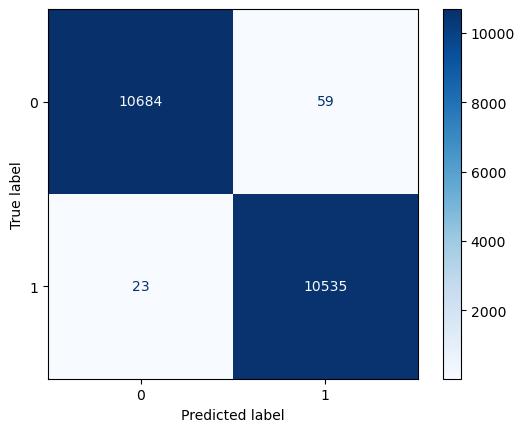

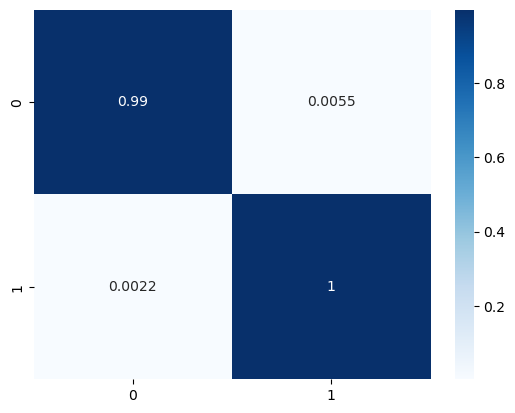

In [191]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9993897000140839
 The recall score is 0.9989590233746569
 The f1 score is 0.9993846153846154
 The ROC AUC score is 0.9993933238147629

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99899999 0.99899999 1.         1.         0.999     ]

Mean cross validation score: 0.9993999966999813



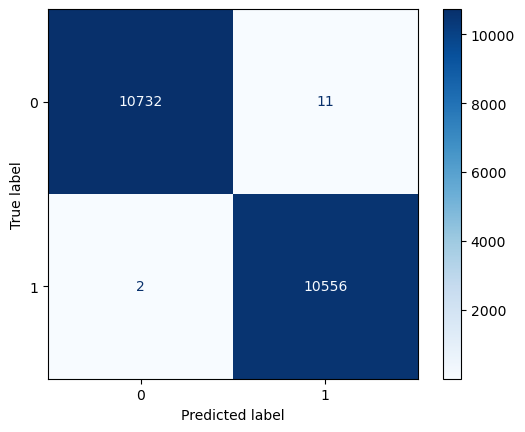

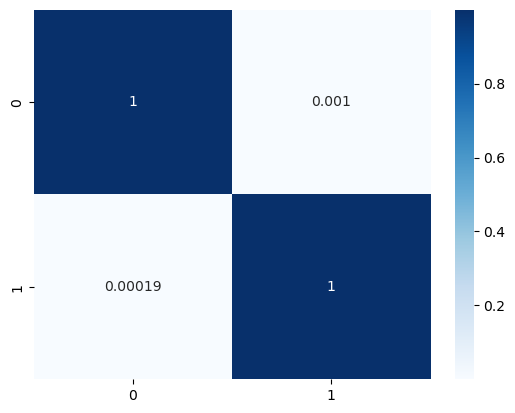

In [192]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

##### 4000 samples

In [193]:
X_train_sample, y_train_sample = spt.sample(4000)

X_train_sample.shape

(4000, 11)

The accuracy score is 0.8834327026900145
 The recall score is 0.87215411558669
 The f1 score is 0.884009903302658
 The ROC AUC score is 0.8835425674964285

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88     10743
           1       0.87      0.90      0.88     10558

    accuracy                           0.88     21301
   macro avg       0.88      0.88      0.88     21301
weighted avg       0.88      0.88      0.88     21301


Cross validation score: [0.52999706 0.53499709 0.51499697 0.45999662 0.38      ]

Mean cross validation score: 0.48399754998468725



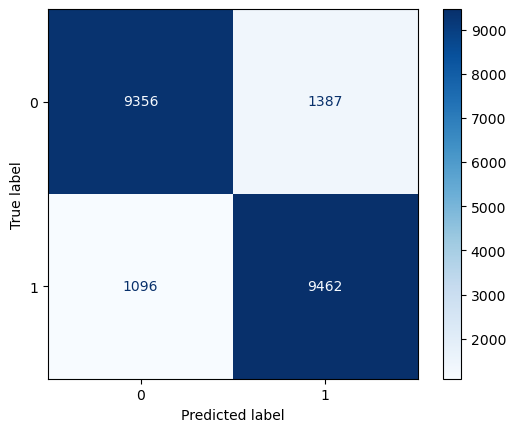

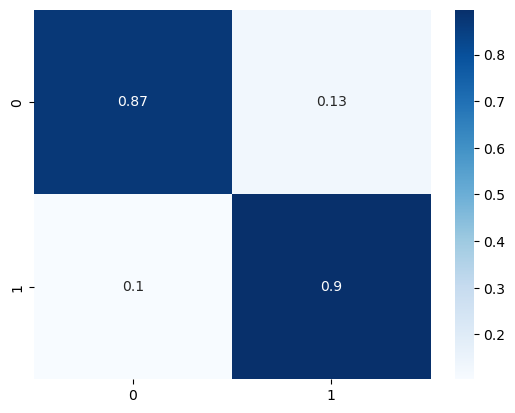

In [194]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9856814234073518
 The recall score is 0.9845005197996408
 The f1 score is 0.9855716921330243
 The ROC AUC score is 0.9856897217547015

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     10743
           1       0.98      0.99      0.99     10558

    accuracy                           0.99     21301
   macro avg       0.99      0.99      0.99     21301
weighted avg       0.99      0.99      0.99     21301


Cross validation score: [0.94999969 0.92499953 0.89499934 0.94999969 0.89      ]

Mean cross validation score: 0.9219996499978125



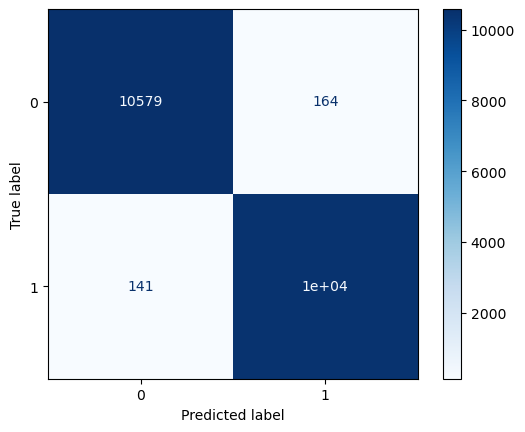

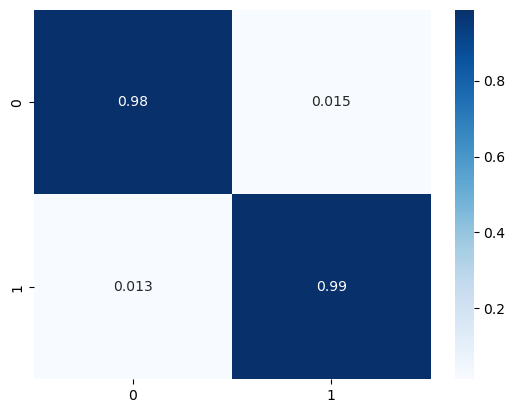

In [195]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9985916154171166
 The recall score is 0.9973544973544973
 The f1 score is 0.998581023555009
 The ROC AUC score is 0.9986021109319554

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [1.         0.98499991 0.98499991 1.         1.        ]

Mean cross validation score: 0.9939999624997655



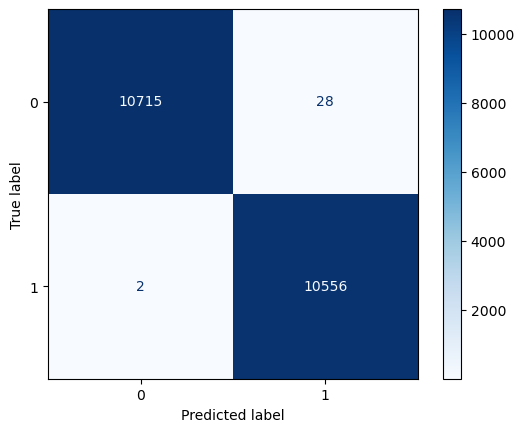

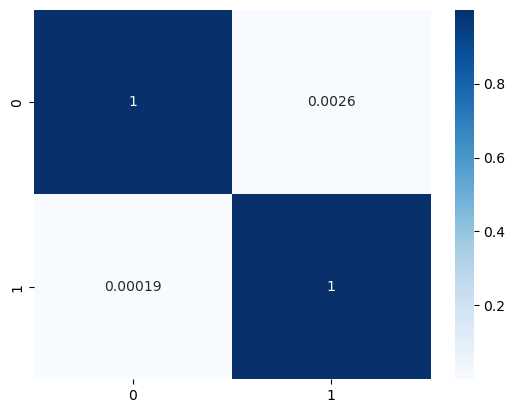

In [196]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

#### Imbalanced data

In [197]:
# 11 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean()
df.shape

(578127, 12)

In [198]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(462501, 11)

##### 20,000 samples

In [199]:
X_train_sample, y_train_sample = spt.sample(20000)

X_train_sample.shape

(20000, 11)

The accuracy score is 0.6463944095618632
 The recall score is 0.20618957014716732
 The f1 score is 0.3418858448958568
 The ROC AUC score is 0.8053158867112356

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.61      0.76    105006
           1       0.21      1.00      0.34     10620

    accuracy                           0.65    115626
   macro avg       0.60      0.81      0.55    115626
weighted avg       0.93      0.65      0.72    115626


Cross validation score: [-3.30652653 -3.1239705  -3.21244642 -3.09899995 -3.23632989]

Mean cross validation score: -3.1956546587780874



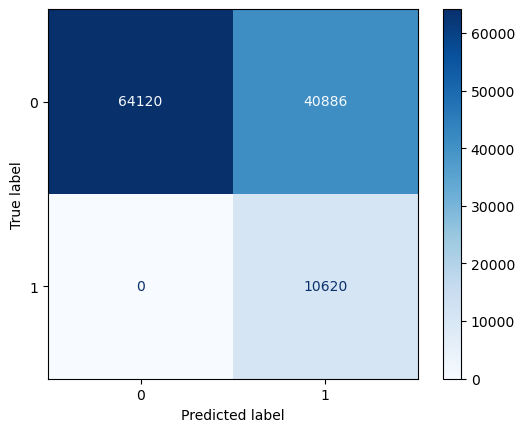

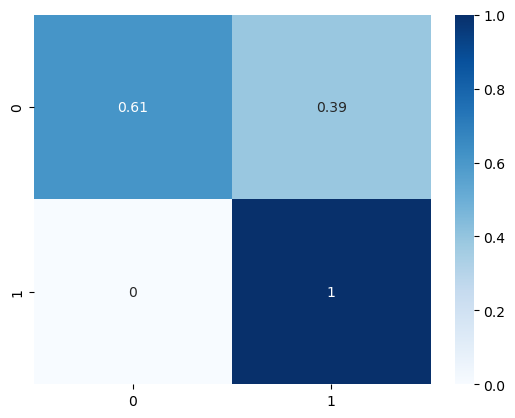

In [200]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9949146385760989
 The recall score is 0.9788087056128293
 The f1 score is 0.9721274175199089
 The ROC AUC score is 0.9817112791294896

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.98      0.97      0.97     10620

    accuracy                           0.99    115626
   macro avg       0.99      0.98      0.98    115626
weighted avg       0.99      0.99      0.99    115626


Cross validation score: [0.91620379 0.9311674  0.94924763 0.8925244  0.910437  ]

Mean cross validation score: 0.9199160454657015



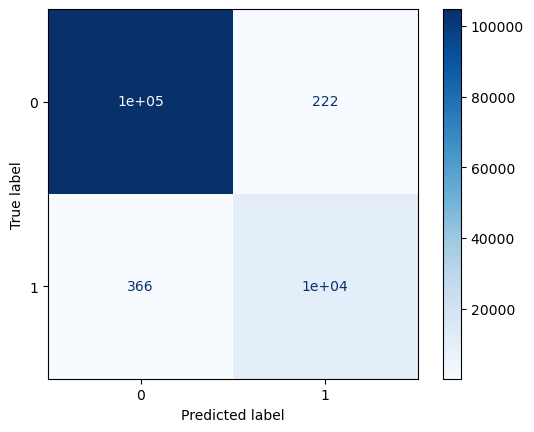

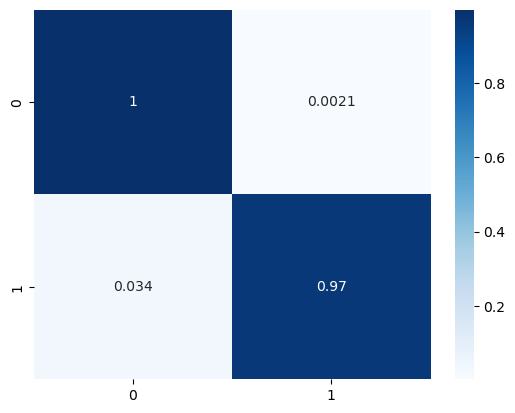

In [201]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9998356770968467
 The recall score is 0.9988705882352941
 The f1 score is 0.9991056719228054
 The ROC AUC score is 0.9996132935529861

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         0.98507283 0.99701457]

Mean cross validation score: 0.996417480010658



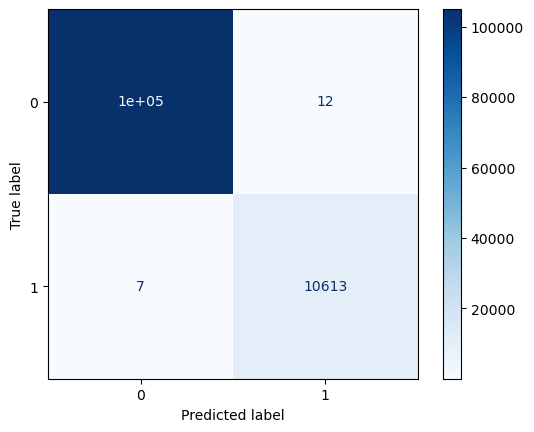

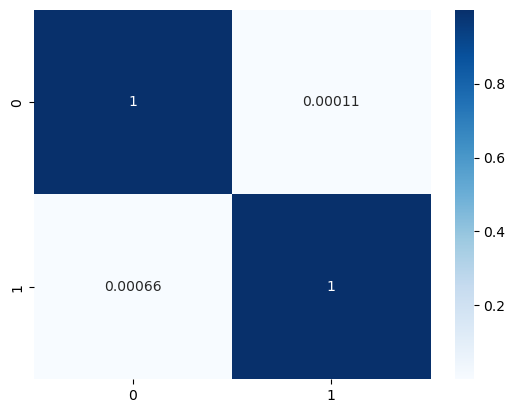

In [202]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

##### 4000 samples

In [203]:
X_train_sample, y_train_sample = spt.sample(4000)

X_train_sample.shape

(4000, 11)

The accuracy score is 0.6587878158891599
 The recall score is 0.21198681450404555
 The f1 score is 0.34976514215080345
 The ROC AUC score is 0.8117584322058111

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.62      0.77    105006
           1       0.21      1.00      0.35     10620

    accuracy                           0.66    115626
   macro avg       0.61      0.81      0.56    115626
weighted avg       0.93      0.66      0.73    115626


Cross validation score: [-3.17553843 -2.99076763 -3.22902241 -2.78229469 -3.33325888]

Mean cross validation score: -3.1021764075443454



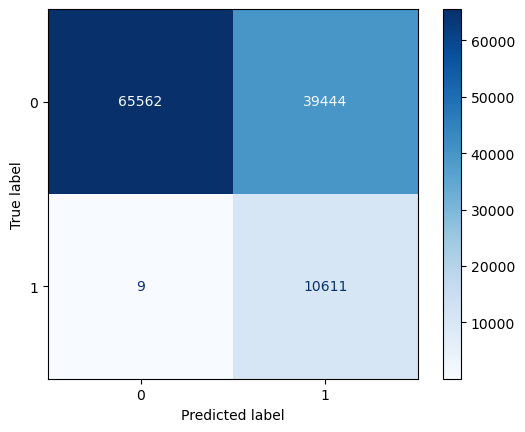

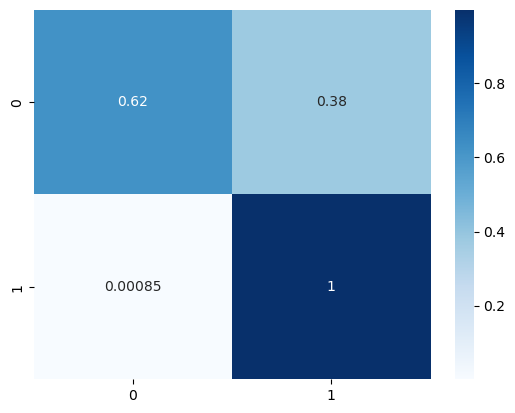

In [204]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9831439295660146
 The recall score is 0.9190913484775254
 The f1 score is 0.9070355354161698
 The ROC AUC score is 0.9436604644921555

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    105006
           1       0.92      0.90      0.91     10620

    accuracy                           0.98    115626
   macro avg       0.95      0.94      0.95    115626
weighted avg       0.98      0.98      0.98    115626


Cross validation score: [0.78896196 0.83619984 0.73196337 0.64261782 0.61283598]

Mean cross validation score: 0.7225157924118664



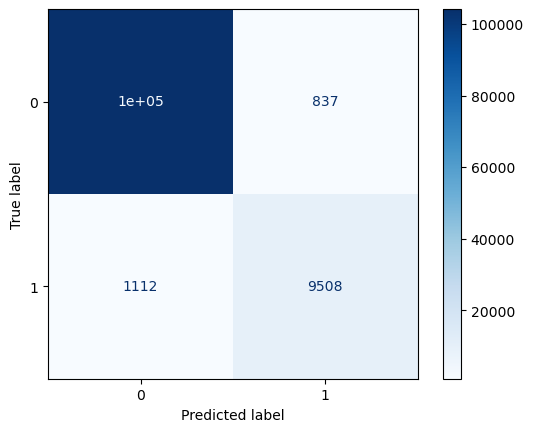

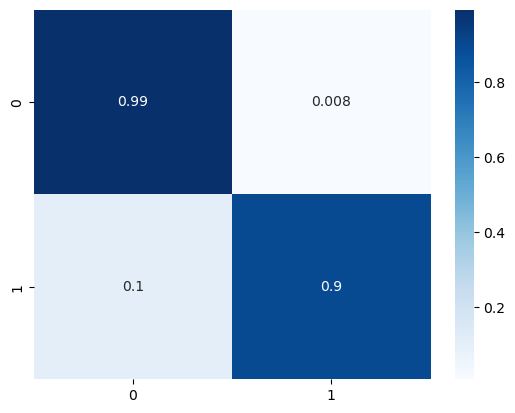

In [205]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9994810855689896
 The recall score is 0.9972687888491242
 The f1 score is 0.9971748752236557
 The ROC AUC score is 0.9984024022947949

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         0.95532723 0.98510908]

Mean cross validation score: 0.9880872608145335



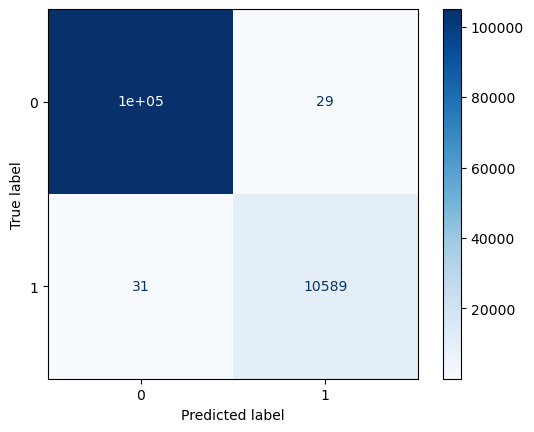

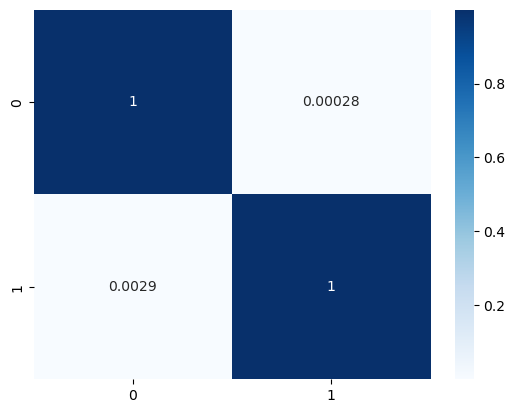

In [206]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

## 15 features

### SMOTE

In [207]:
# 15 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.drop(columns=['estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'], inplace=True)
df = dp.OverallProcessor(df).smote()
df.shape

(1049752, 16)

In [208]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(839801, 15)

#### 20,000 samples

In [209]:
X_train_sample, y_train_sample = spt.sample(20000)

X_train_sample.shape

(20000, 15)

The accuracy score is 0.9241156269796286
 The recall score is 0.8774098963585671
 The f1 score is 0.9285579760185825
 The ROC AUC score is 0.9240994010501505

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92    104948
           1       0.88      0.99      0.93    105003

    accuracy                           0.92    209951
   macro avg       0.93      0.92      0.92    209951
weighted avg       0.93      0.92      0.92    209951


Cross validation score: [0.708      0.668      0.695      0.685      0.68399992]

Mean cross validation score: 0.687999984199996



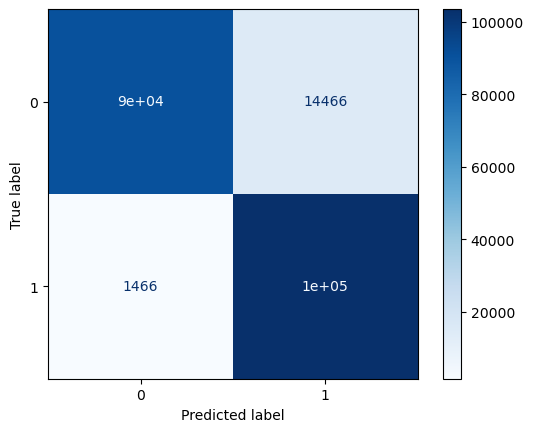

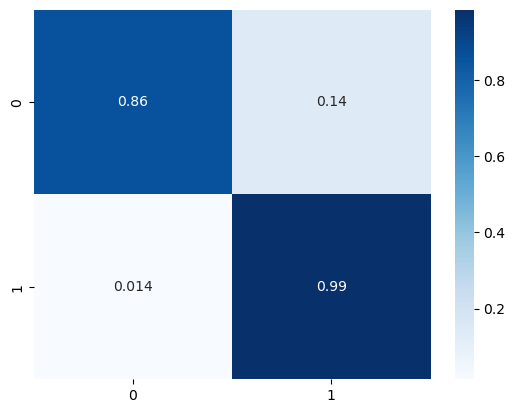

In [210]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9953846373677667
 The recall score is 0.9947779933797511
 The f1 score is 0.9953886787065458
 The ROC AUC score is 0.9953844760915619

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    104948
           1       0.99      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.976      0.977      0.984      0.975      0.97599999]

Mean cross validation score: 0.9775999987999997



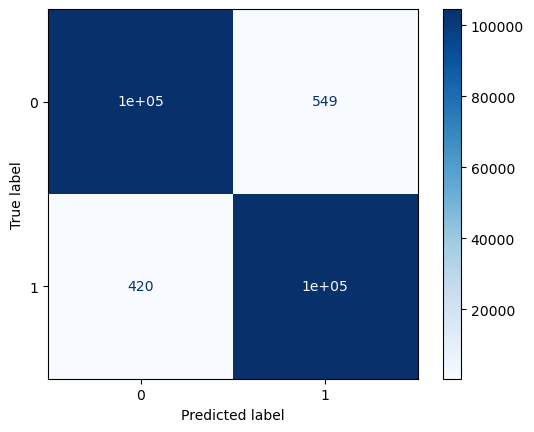

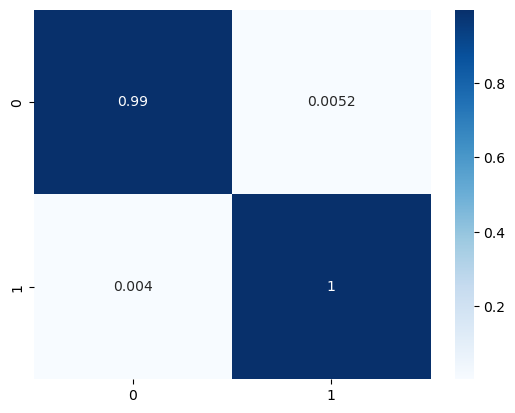

In [211]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9997142190320598
 The recall score is 0.9999333060205609
 The f1 score is 0.999714231282149
 The ROC AUC score is 0.9997142764088481

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.995 0.998 1.    1.    1.   ]

Mean cross validation score: 0.9986



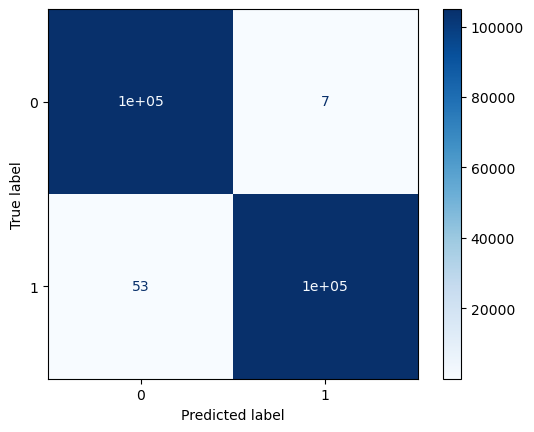

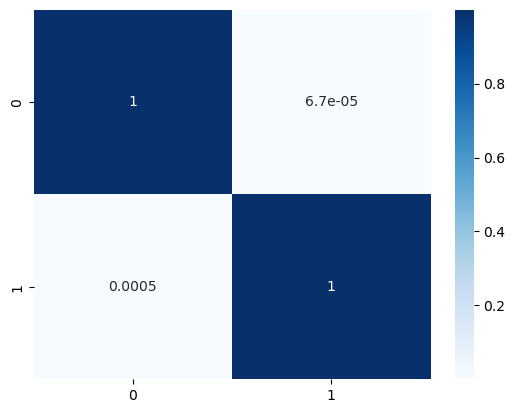

In [212]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

#### 4000 samples

In [213]:
X_train_sample, y_train_sample = spt.sample(4000)

X_train_sample.shape

(4000, 15)

The accuracy score is 0.8969902501059771
 The recall score is 0.8568322662375458
 The f1 score is 0.9025068633328975
 The ROC AUC score is 0.8969754884186929

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89    104948
           1       0.86      0.95      0.90    105003

    accuracy                           0.90    209951
   macro avg       0.90      0.90      0.90    209951
weighted avg       0.90      0.90      0.90    209951


Cross validation score: [0.575 0.615 0.59  0.53  0.595]

Mean cross validation score: 0.5810000000000001



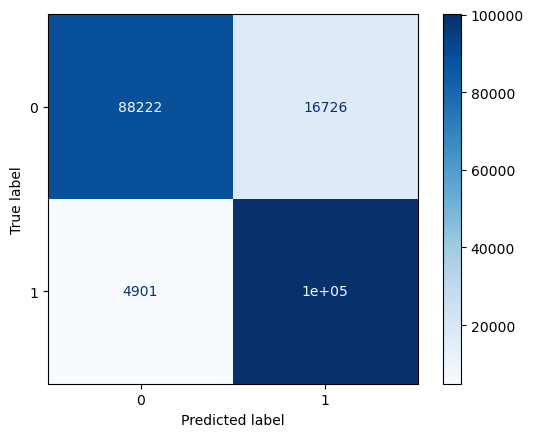

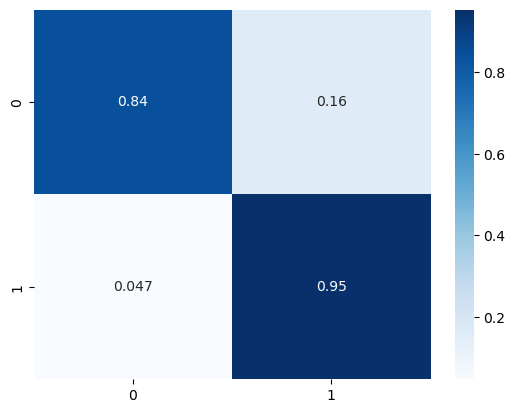

In [214]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9840057918276169
 The recall score is 0.9833195439026942
 The f1 score is 0.9840213936313976
 The ROC AUC score is 0.9840056035678215

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    104948
           1       0.98      0.98      0.98    105003

    accuracy                           0.98    209951
   macro avg       0.98      0.98      0.98    209951
weighted avg       0.98      0.98      0.98    209951


Cross validation score: [0.93  0.905 0.93  0.895 0.93 ]

Mean cross validation score: 0.9179999999999999



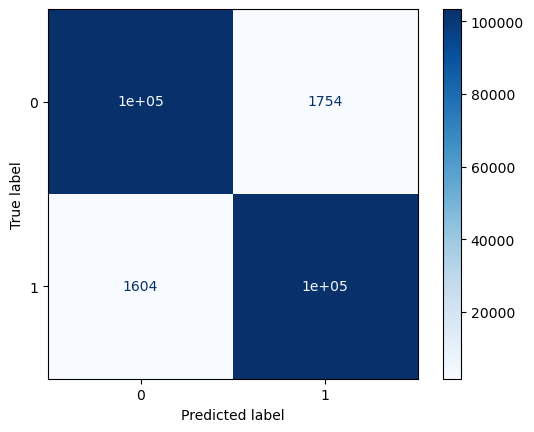

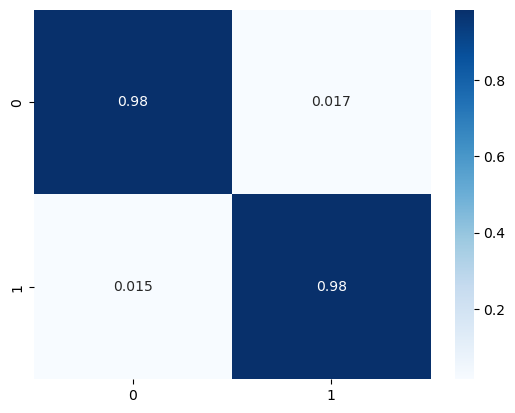

In [215]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9995379874351634
 The recall score is 0.9996570710053535
 The f1 score is 0.9995380534429306
 The ROC AUC score is 0.9995380185971532

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.99  0.985 1.    0.995 0.995]

Mean cross validation score: 0.993



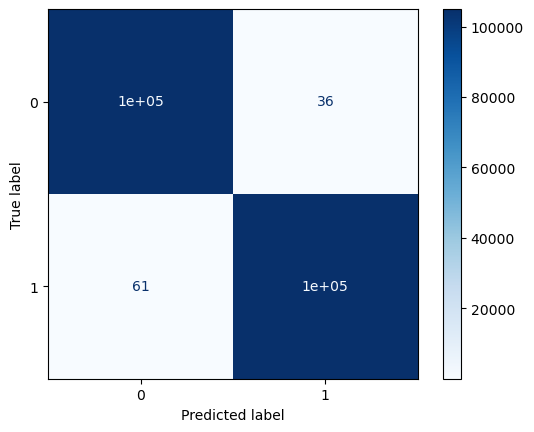

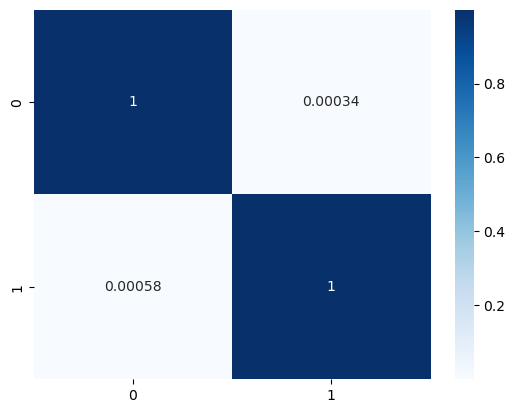

In [216]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

### ADASYN

In [217]:
# 15 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.drop(columns=['estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'], inplace=True)
df = dp.OverallProcessor(df).adasyn()
df.shape

(1048269, 16)

In [218]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(838615, 15)

#### 20,000 samples

In [219]:
X_train_sample, y_train_sample = spt.sample(20000)

X_train_sample.shape

(20000, 15)

The accuracy score is 0.9224865731157049
 The recall score is 0.875160024077795
 The f1 score is 0.9270283741126074
 The ROC AUC score is 0.9225315763229371

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92    104902
           1       0.88      0.99      0.93    104752

    accuracy                           0.92    209654
   macro avg       0.93      0.92      0.92    209654
weighted avg       0.93      0.92      0.92    209654


Cross validation score: [0.71499886 0.69599932 0.65799923 0.69399931 0.67599927]

Mean cross validation score: 0.6877991977977961



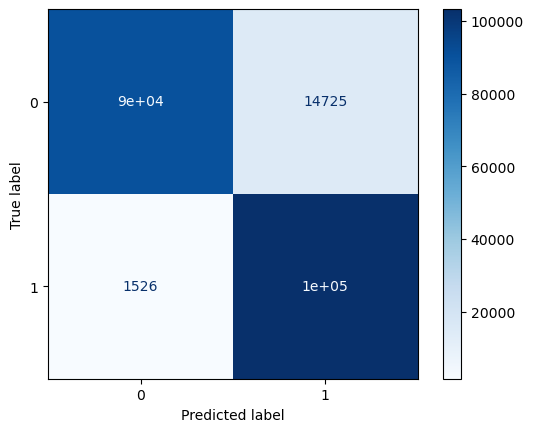

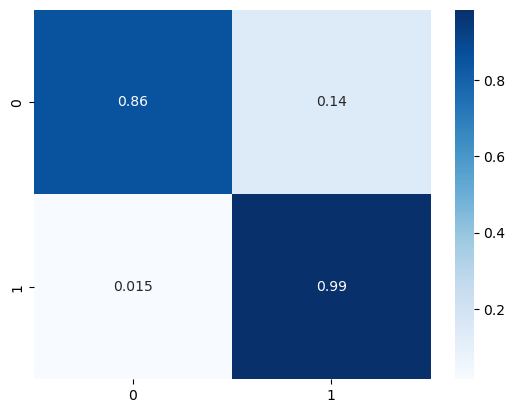

In [220]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9953590200997835
 The recall score is 0.9938235769959173
 The f1 score is 0.9953628907348364
 The ROC AUC score is 0.9953601268185757

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    104902
           1       0.99      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [0.97099988 0.96299992 0.97999995 0.97799995 0.97399994]

Mean cross validation score: 0.9731999295498011



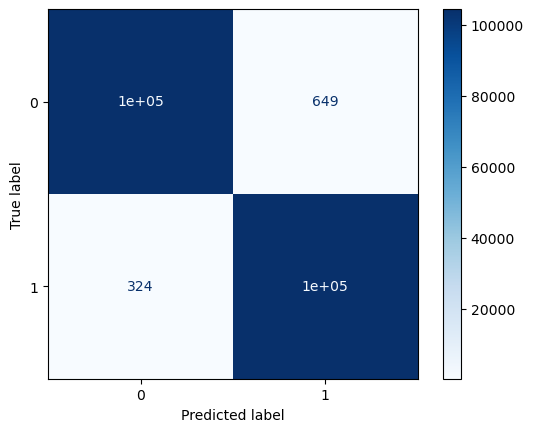

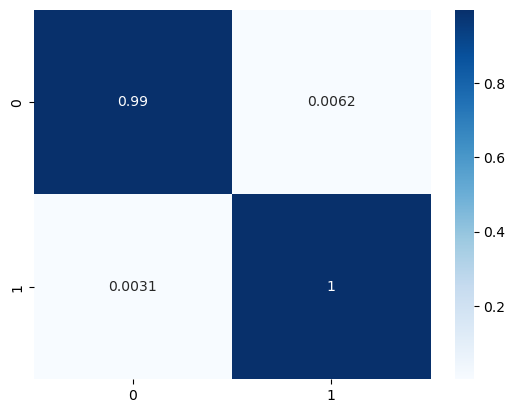

In [221]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9998759861486067
 The recall score is 0.9999140762239365
 The f1 score is 0.9998758926184749
 The ROC AUC score is 0.9998759587843387

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [1.         1.         0.999      0.99699999 0.99699999]

Mean cross validation score: 0.9985999968499929



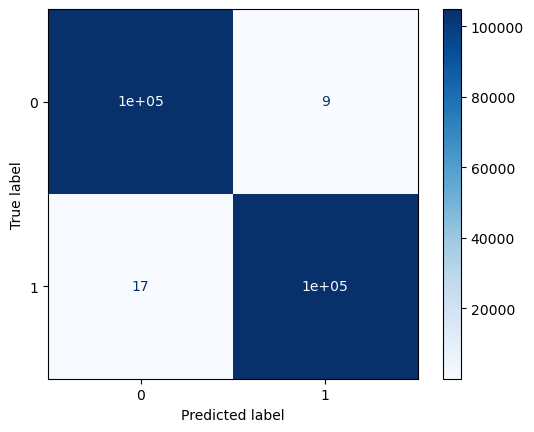

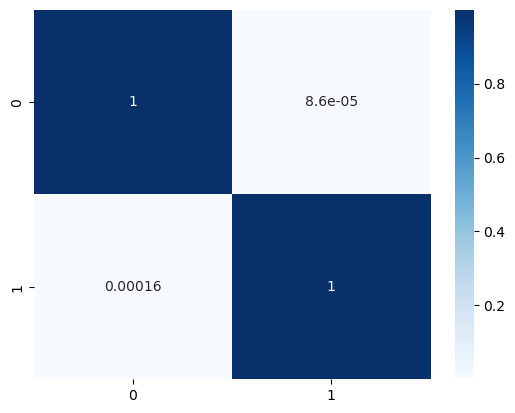

In [222]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

#### 4000 samples

In [223]:
X_train_sample, y_train_sample = spt.sample(4000)

X_train_sample.shape

(4000, 15)

The accuracy score is 0.8975025518234806
 The recall score is 0.8569321913286522
 The f1 score is 0.9029355568704859
 The ROC AUC score is 0.8975430580874224

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89    104902
           1       0.86      0.95      0.90    104752

    accuracy                           0.90    209654
   macro avg       0.90      0.90      0.90    209654
weighted avg       0.90      0.90      0.90    209654


Cross validation score: [0.61499759 0.54999719 0.62999769 0.63       0.615     ]

Mean cross validation score: 0.6079984937405858



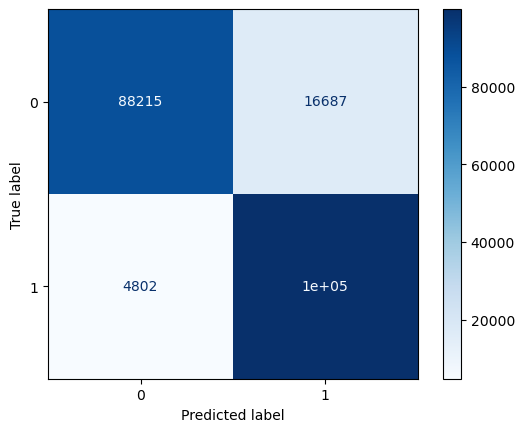

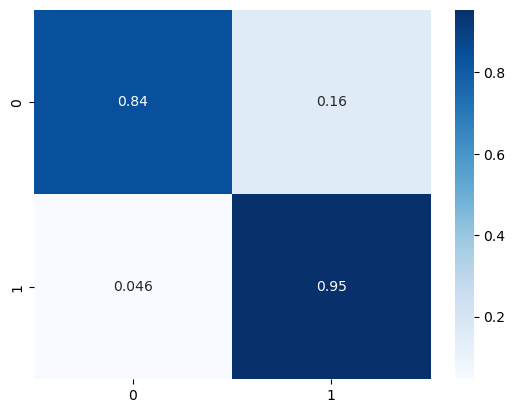

In [224]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9815982523586481
 The recall score is 0.9753321398285122
 The f1 score is 0.9817054087119811
 The ROC AUC score is 0.9816029454995019

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98    104902
           1       0.98      0.99      0.98    104752

    accuracy                           0.98    209654
   macro avg       0.98      0.98      0.98    209654
weighted avg       0.98      0.98      0.98    209654


Cross validation score: [0.92999956 0.9199995  0.9199995  0.9        0.885     ]

Mean cross validation score: 0.910999712498203



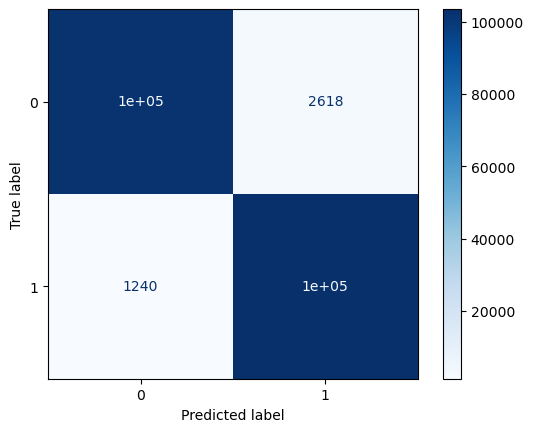

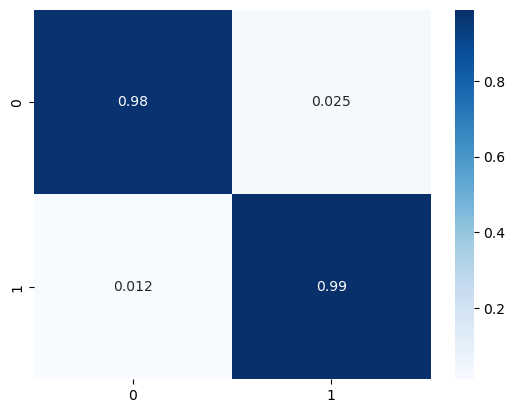

In [225]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9993751609795186
 The recall score is 0.9992841530576209
 The f1 score is 0.9993747703116126
 The ROC AUC score is 0.9993752254990385

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [1.         0.99499997 0.99499997 1.         1.        ]

Mean cross validation score: 0.9979999874999219



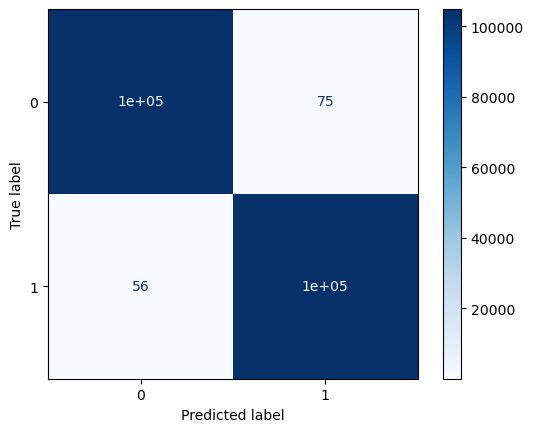

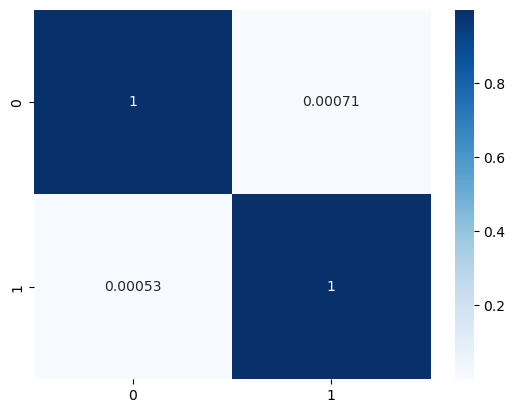

In [226]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

### Random Under Sampler

In [227]:
# 15 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.drop(columns=['estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'], inplace=True)
df = dp.OverallProcessor(df).rus()
df.shape

(106502, 16)

In [228]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(85201, 15)

#### 20,000 samples

In [229]:
X_train_sample, y_train_sample = spt.sample(20000)

X_train_sample.shape

(20000, 15)

The accuracy score is 0.92150603258063
 The recall score is 0.8815043791859866
 The f1 score is 0.924698252567105
 The ROC AUC score is 0.9219437541032767

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92     10743
           1       0.88      0.97      0.92     10558

    accuracy                           0.92     21301
   macro avg       0.93      0.92      0.92     21301
weighted avg       0.93      0.92      0.92     21301


Cross validation score: [0.65299783 0.68399802 0.6749987  0.64199857 0.66699867]

Mean cross validation score: 0.6641983584415689



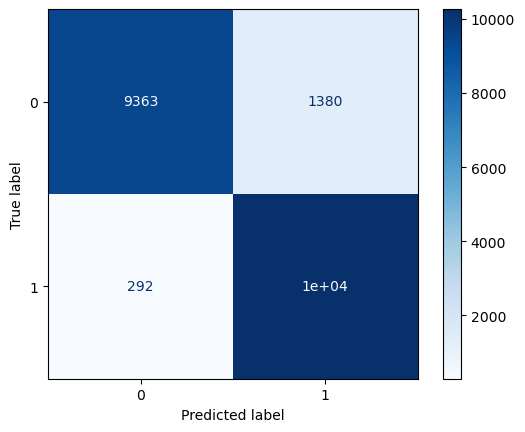

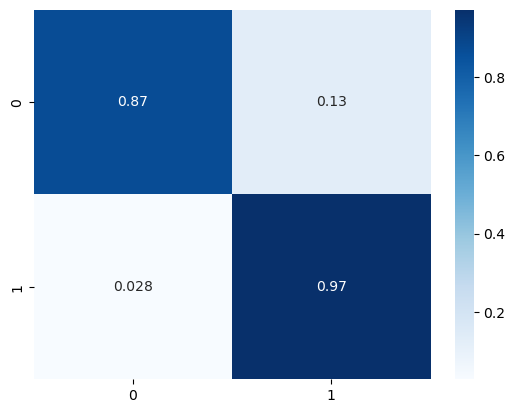

In [230]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9952114924181963
 The recall score is 0.9927426955702168
 The f1 score is 0.9951814058956916
 The ROC AUC score is 0.9952323347086435

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     10743
           1       0.99      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.97899987 0.97999987 0.97999992 0.97099988 0.98499994]

Mean cross validation score: 0.9789998975494749



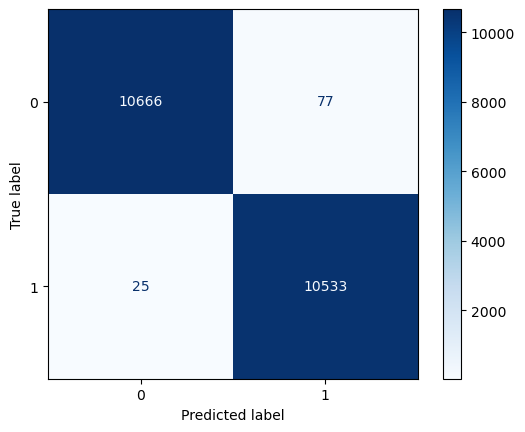

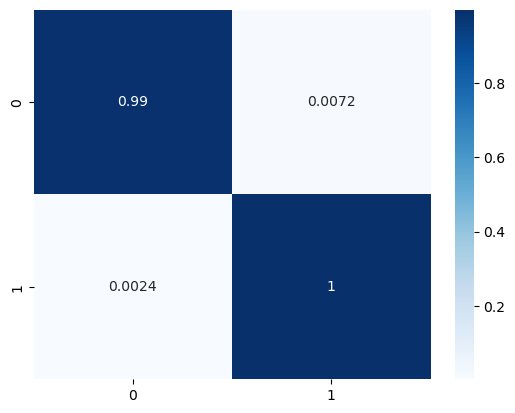

In [231]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9997183230834233
 The recall score is 0.9994320333207118
 The f1 score is 0.9997159359909099
 The ROC AUC score is 0.9997207483943032

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99799999 1.         1.         1.         1.        ]

Mean cross validation score: 0.9995999974999844



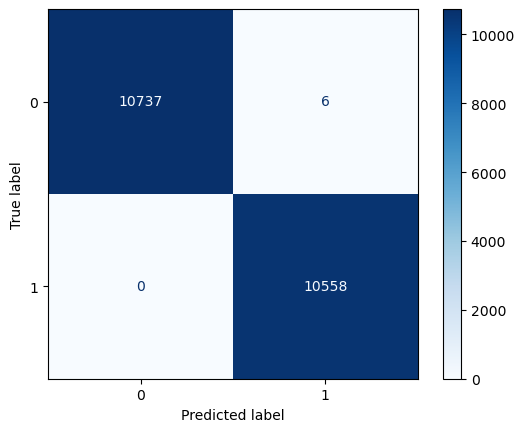

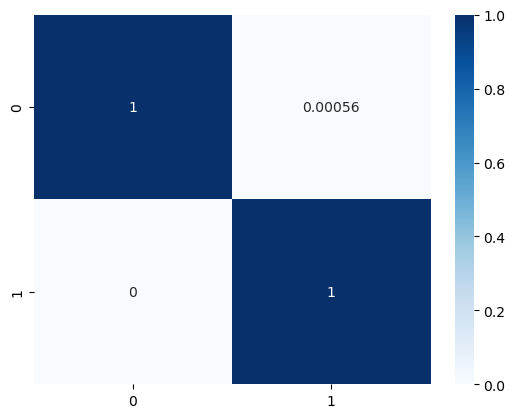

In [232]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

#### 4000 samples

In [233]:
X_train_sample, y_train_sample = spt.sample(4000)

X_train_sample.shape

(4000, 15)

The accuracy score is 0.8875639641331393
 The recall score is 0.8599523767528001
 The f1 score is 0.8906242864319314
 The ROC AUC score is 0.8878739429298728

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.85      0.88     10743
           1       0.86      0.92      0.89     10558

    accuracy                           0.89     21301
   macro avg       0.89      0.89      0.89     21301
weighted avg       0.89      0.89      0.89     21301


Cross validation score: [0.58499741 0.57499734 0.53499709 0.50499691 0.555     ]

Mean cross validation score: 0.5509977499859373



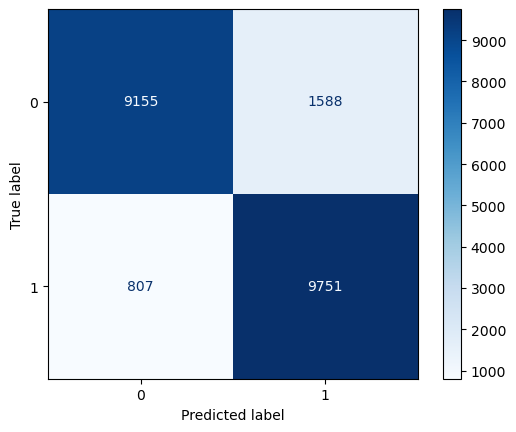

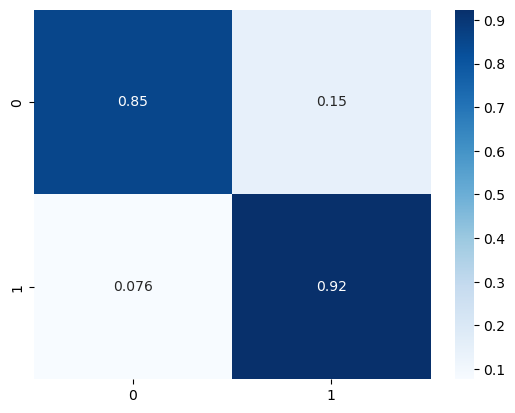

In [234]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9819257311863293
 The recall score is 0.9740889178861031
 The f1 score is 0.9819138441302203
 The ROC AUC score is 0.9819940946846148

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     10743
           1       0.97      0.99      0.98     10558

    accuracy                           0.98     21301
   macro avg       0.98      0.98      0.98     21301
weighted avg       0.98      0.98      0.98     21301


Cross validation score: [0.88499928 0.93499959 0.90499941 0.90499941 0.9       ]

Mean cross validation score: 0.9059995374971095



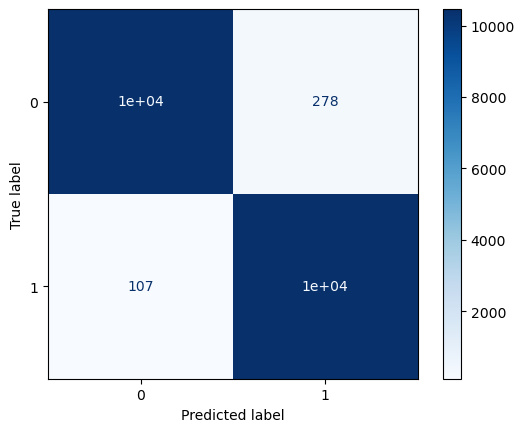

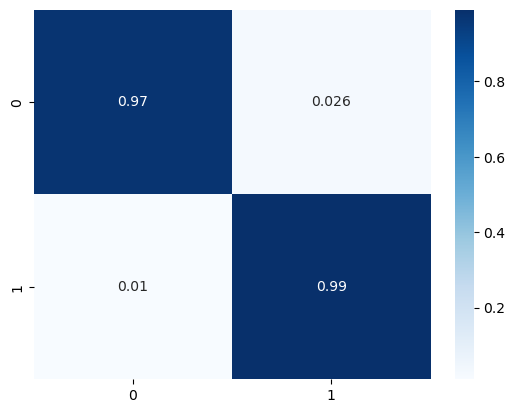

In [235]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9985916154171166
 The recall score is 0.9973544973544973
 The f1 score is 0.998581023555009
 The ROC AUC score is 0.9986021109319554

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [1.         0.98499991 0.98999994 1.         1.        ]

Mean cross validation score: 0.9949999687498046



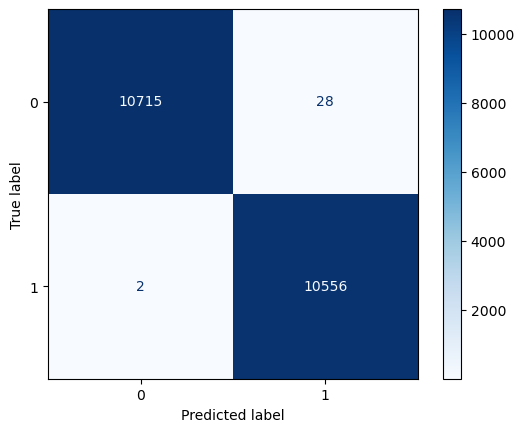

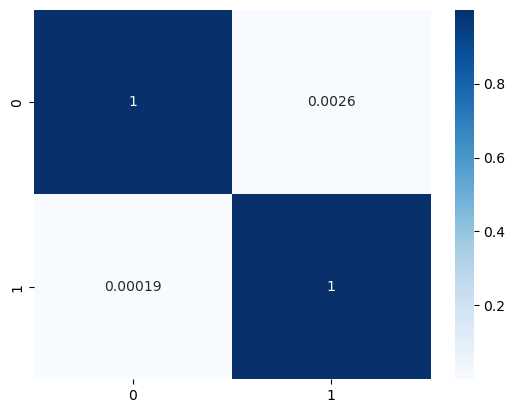

In [236]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

### Imbalanced

In [237]:
# 15 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.drop(columns=['estimated_diameter_min', 'estimated_diameter_max', 'estimated_diameter_average'], inplace=True)
df.shape

(578127, 16)

In [238]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(462501, 15)

#### 20,000 samples

In [239]:
X_train_sample, y_train_sample = spt.sample(20000)

X_train_sample.shape

(20000, 15)

The accuracy score is 0.6716136509089651
 The recall score is 0.21856349043012965
 The f1 score is 0.3587231886505658
 The ROC AUC score is 0.8192008075729006

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.64      0.78    105006
           1       0.22      1.00      0.36     10620

    accuracy                           0.67    115626
   macro avg       0.61      0.82      0.57    115626
weighted avg       0.93      0.67      0.74    115626


Cross validation score: [-3.00426164 -2.92345815 -2.88404876 -2.87210702 -2.97062632]

Mean cross validation score: -2.930900376785572



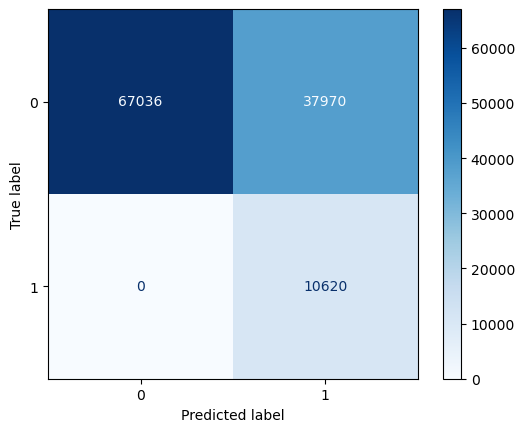

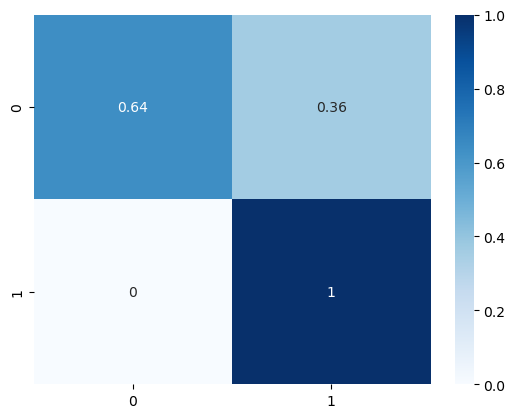

In [240]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9947676128206459
 The recall score is 0.9767685423212416
 The f1 score is 0.971358235099181
 The ROC AUC score is 0.981841928107202

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.98      0.97      0.97     10620

    accuracy                           0.99    115626
   macro avg       0.99      0.98      0.98    115626
weighted avg       0.99      0.99      0.99    115626


Cross validation score: [0.91021835 0.90722563 0.92237873 0.88058267 0.93133503]

Mean cross validation score: 0.9103480820747123



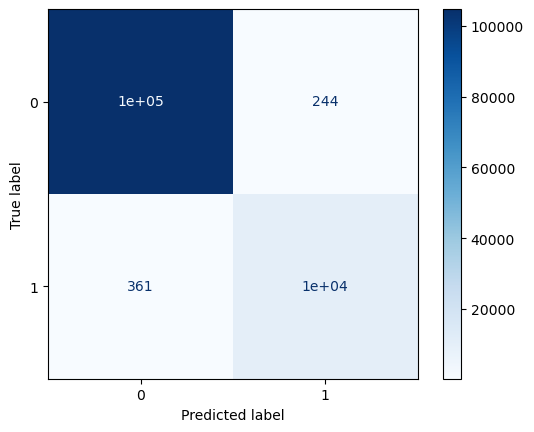

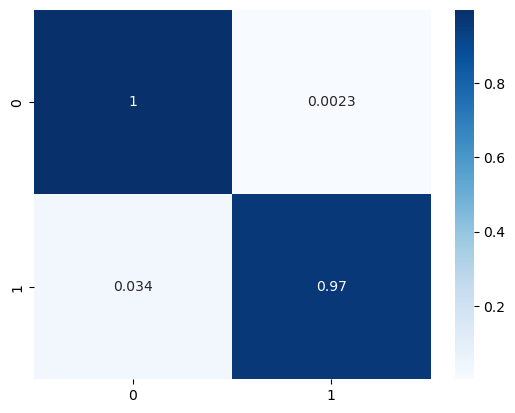

In [241]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9997059484890941
 The recall score is 0.999057137469357
 The f1 score is 0.9983981908979553
 The ROC AUC score is 0.9988224401704889

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         0.98507283 0.99701457]

Mean cross validation score: 0.996417480010658



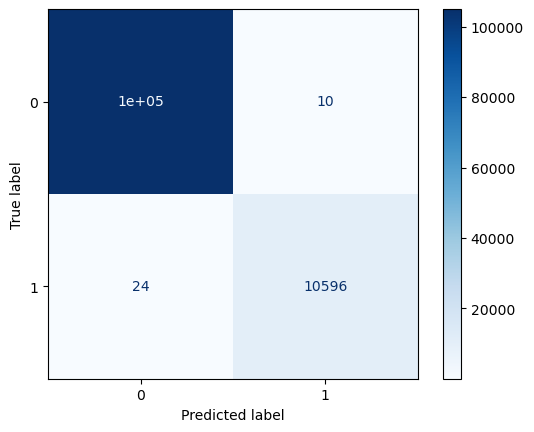

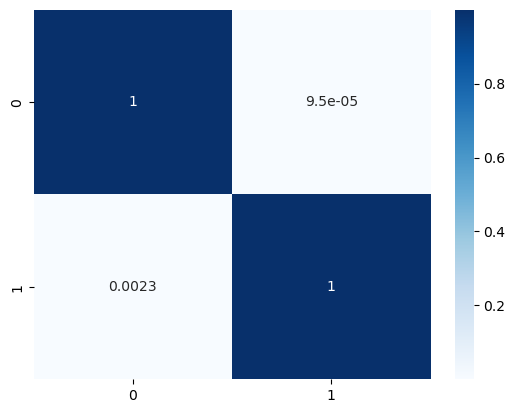

In [242]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

#### 4000 samples

In [243]:
X_train_sample, y_train_sample = spt.sample(4000)

X_train_sample.shape

(4000, 15)

The accuracy score is 0.6742428173594174
 The recall score is 0.21991632492440247
 The f1 score is 0.360531051577196
 The ROC AUC score is 0.8205637052109263

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.64      0.78    105006
           1       0.22      1.00      0.36     10620

    accuracy                           0.67    115626
   macro avg       0.61      0.82      0.57    115626
weighted avg       0.93      0.67      0.74    115626


Cross validation score: [-2.96450039 -2.91631301 -2.93120393 -2.88653116 -3.31836795]

Mean cross validation score: -3.0033832877382087



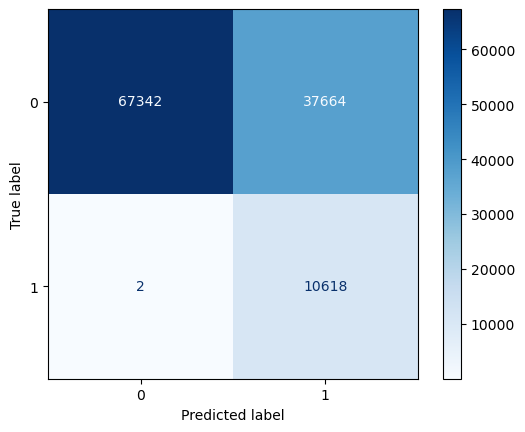

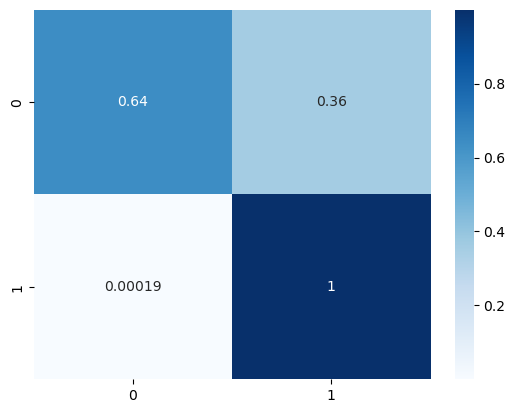

In [244]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.975273727362358
 The recall score is 0.8687636605530742
 The f1 score is 0.8647779406895899
 The ROC AUC score is 0.9238384979023528

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    105006
           1       0.87      0.86      0.86     10620

    accuracy                           0.98    115626
   macro avg       0.93      0.92      0.93    115626
weighted avg       0.98      0.98      0.98    115626


Cross validation score: [0.65329464 0.76174522 0.70218152 0.6277269  0.61283598]

Mean cross validation score: 0.6715568513211807



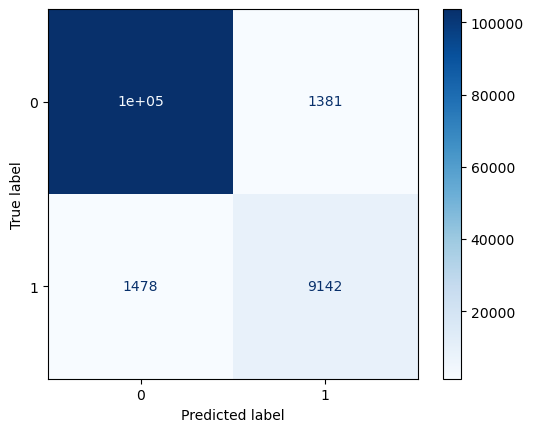

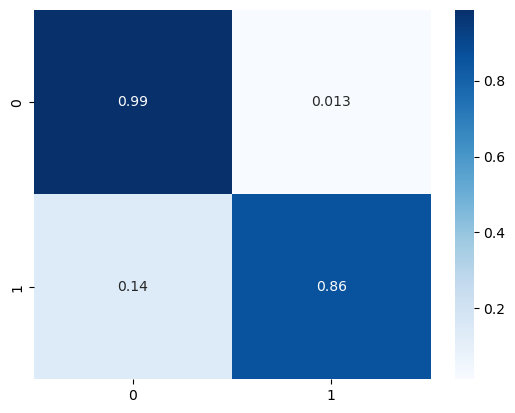

In [245]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.999195682631934
 The recall score is 0.9962289054398039
 The f1 score is 0.995618787393414
 The ROC AUC score is 0.9973142427911841

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [0.96985171 1.         0.9404363  0.9404363  0.98510908]

Mean cross validation score: 0.9671666784505331



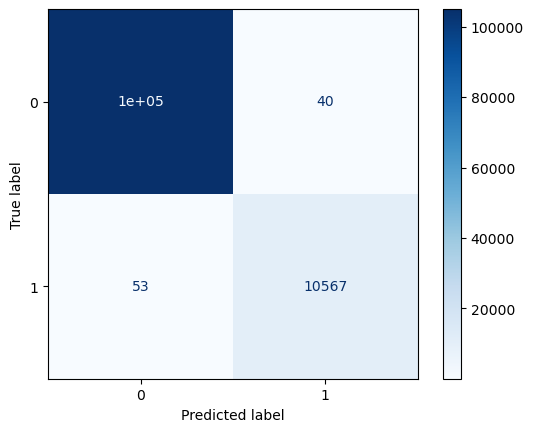

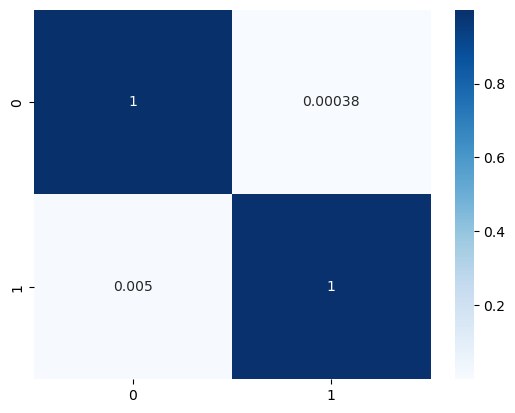

In [246]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

## 18 features

### Smote

In [247]:
# 18 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df = dp.OverallProcessor(df).smote()
df.shape

(1049752, 19)

In [248]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(839801, 18)

#### 20,000 samples

In [249]:
X_train_sample, y_train_sample = spt.sample(20000)

X_train_sample.shape

(20000, 18)

The accuracy score is 0.9243585408023777
 The recall score is 0.8773350043185937
 The f1 score is 0.9288157169303038
 The ROC AUC score is 0.9243422013445172

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92    104948
           1       0.88      0.99      0.93    105003

    accuracy                           0.92    209951
   macro avg       0.93      0.92      0.92    209951
weighted avg       0.93      0.92      0.92    209951


Cross validation score: [0.708      0.669      0.695      0.686      0.68399992]

Mean cross validation score: 0.688399984199996



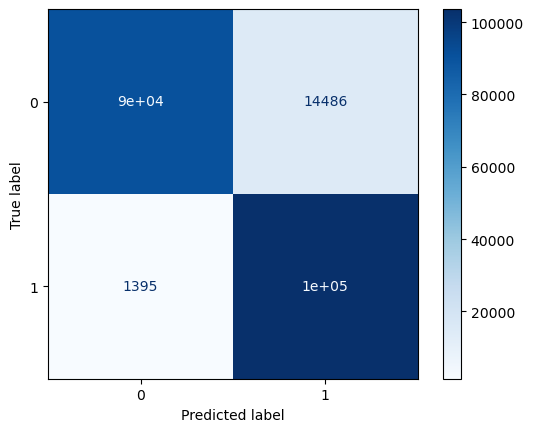

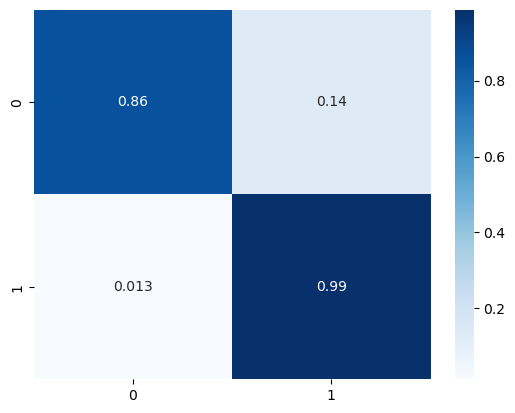

In [250]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.995175064657944
 The recall score is 0.9941457109729904
 The f1 score is 0.9951813533119277
 The ROC AUC score is 0.995174791070052

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    104948
           1       0.99      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.98  0.977 0.985 0.978 0.984]

Mean cross validation score: 0.9807999991999997



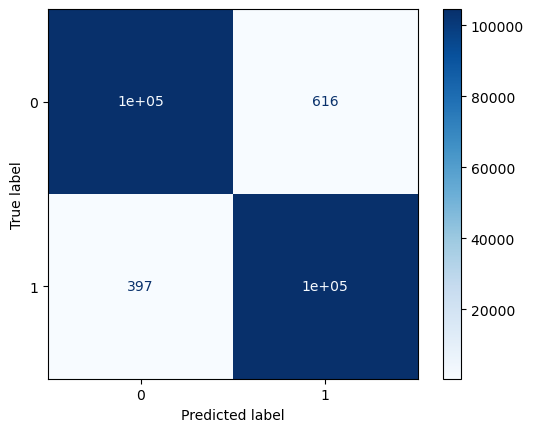

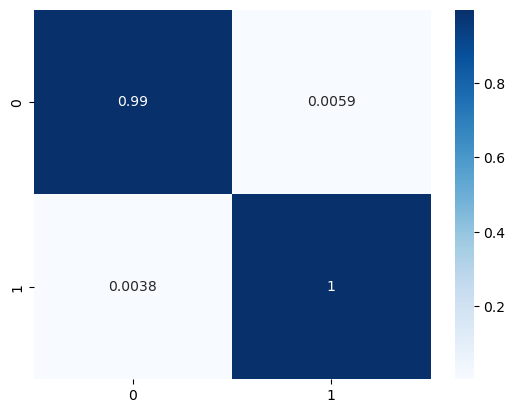

In [251]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9997618491933832
 The recall score is 0.9999523641664205
 The f1 score is 0.9997618662069097
 The ROC AUC score is 0.9997618990869531

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.995 0.998 1.    0.999 1.   ]

Mean cross validation score: 0.9984



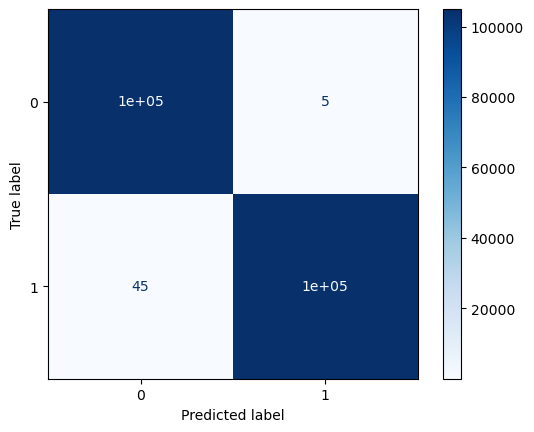

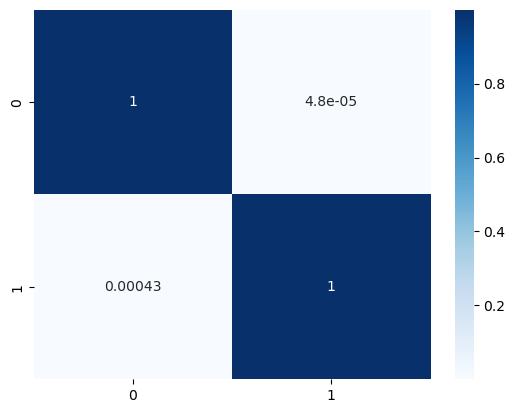

In [252]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

#### 4000 samples

In [253]:
X_train_sample, y_train_sample = spt.sample(4000)

X_train_sample.shape

(4000, 18)

The accuracy score is 0.8965568156379345
 The recall score is 0.8616024522190672
 The f1 score is 0.9013553532820988
 The ROC AUC score is 0.896544133916543

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89    104948
           1       0.86      0.94      0.90    105003

    accuracy                           0.90    209951
   macro avg       0.90      0.90      0.90    209951
weighted avg       0.90      0.90      0.90    209951


Cross validation score: [0.55  0.605 0.575 0.555 0.59 ]

Mean cross validation score: 0.575



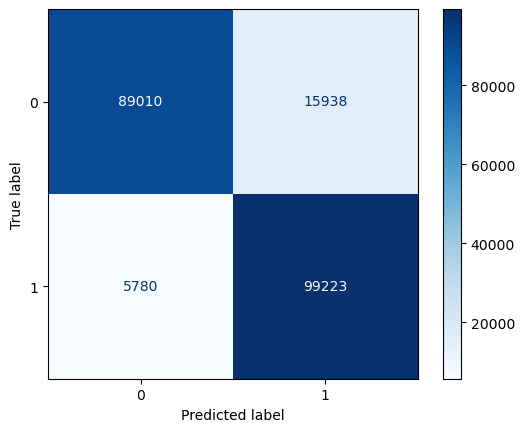

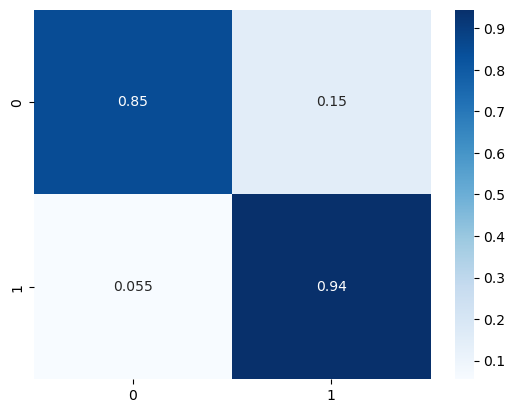

In [254]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9828436158913271
 The recall score is 0.9816829284513144
 The f1 score is 0.982868829068772
 The ROC AUC score is 0.9828432977860012

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    104948
           1       0.98      0.98      0.98    105003

    accuracy                           0.98    209951
   macro avg       0.98      0.98      0.98    209951
weighted avg       0.98      0.98      0.98    209951


Cross validation score: [0.94  0.895 0.925 0.905 0.94 ]

Mean cross validation score: 0.921



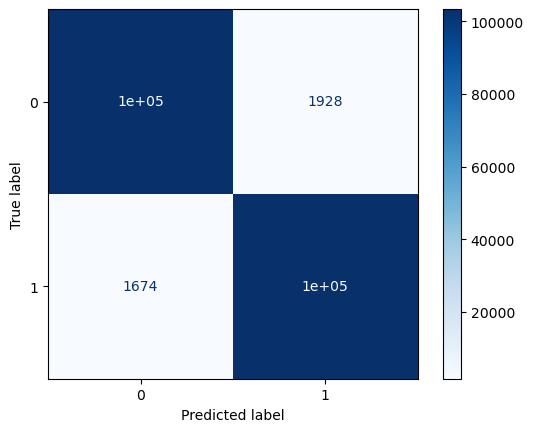

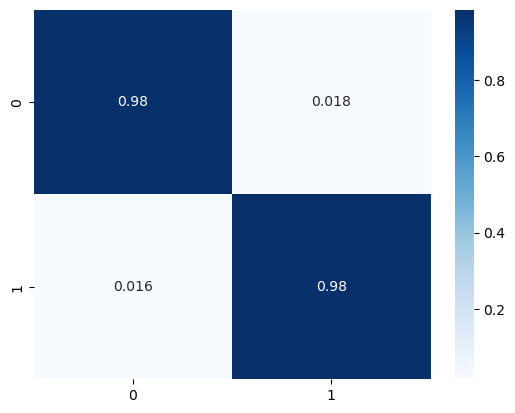

In [255]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9995570394996928
 The recall score is 0.9996951626116943
 The f1 score is 0.9995570943484287
 The ROC AUC score is 0.9995570756539813

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951


Cross validation score: [0.99  0.985 1.    0.995 0.99 ]

Mean cross validation score: 0.992



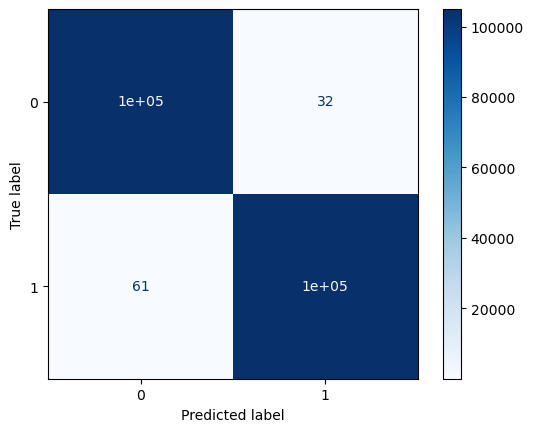

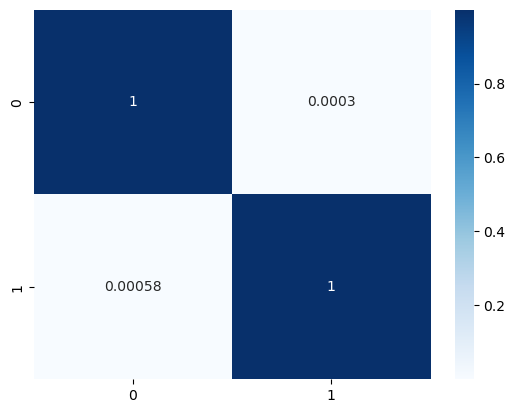

In [256]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

### ADASYN

In [257]:
# 18 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df = dp.OverallProcessor(df).adasyn()
df.shape

(1048269, 19)

In [258]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(838615, 18)

#### 20,000 sample

In [259]:
X_train_sample, y_train_sample = spt.sample(20000)

X_train_sample.shape

(20000, 18)

The accuracy score is 0.9222671639940092
 The recall score is 0.873615651689095
 The f1 score is 0.9269615334627054
 The ROC AUC score is 0.9223136208558231

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92    104902
           1       0.87      0.99      0.93    104752

    accuracy                           0.92    209654
   macro avg       0.93      0.92      0.92    209654
weighted avg       0.93      0.92      0.92    209654


Cross validation score: [0.71799887 0.69399931 0.65799923 0.69399931 0.67599927]

Mean cross validation score: 0.6879991992978036



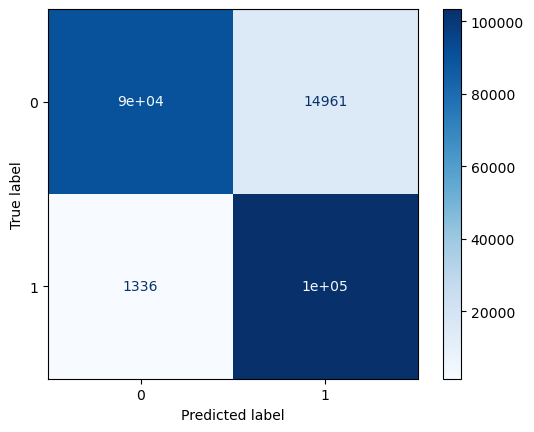

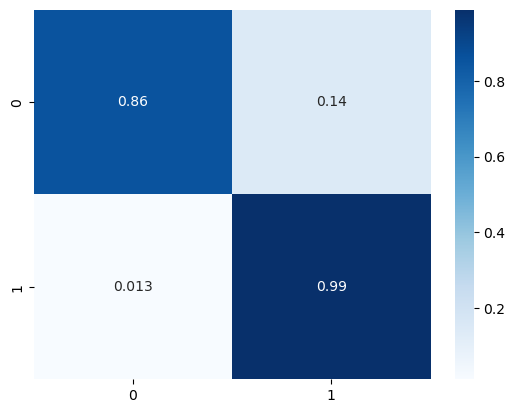

In [260]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9955450408768733
 The recall score is 0.9938070776255707
 The f1 score is 0.9955496683692917
 The ROC AUC score is 0.9955462944326164

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    104902
           1       0.99      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [0.97699991 0.96899993 0.97999995 0.98099996 0.97599995]

Mean cross validation score: 0.9765999392998312



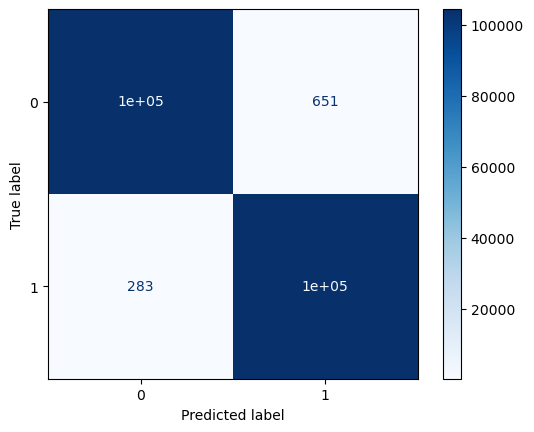

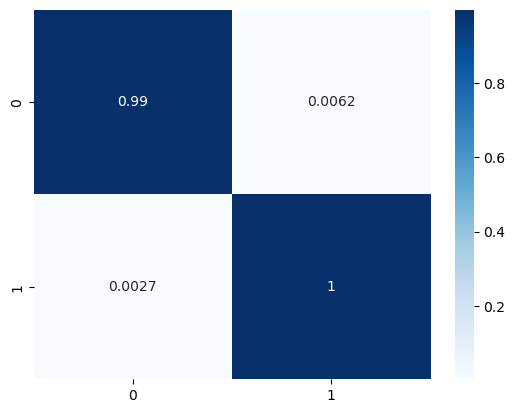

In [261]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9997376630066681
 The recall score is 0.9999140524280189
 The f1 score is 0.9997374288074017
 The ROC AUC score is 0.9997375366062417

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [1.         1.         0.999      0.998      0.99699999]

Mean cross validation score: 0.998799997299994



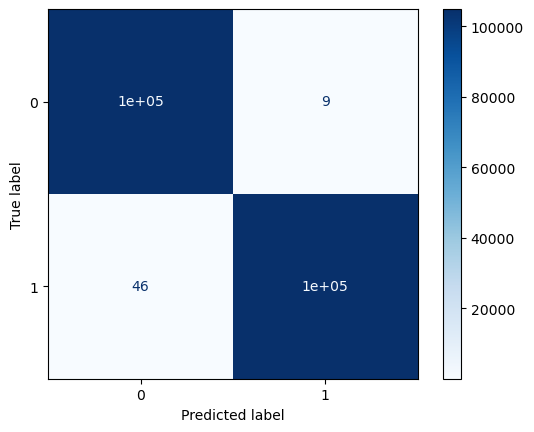

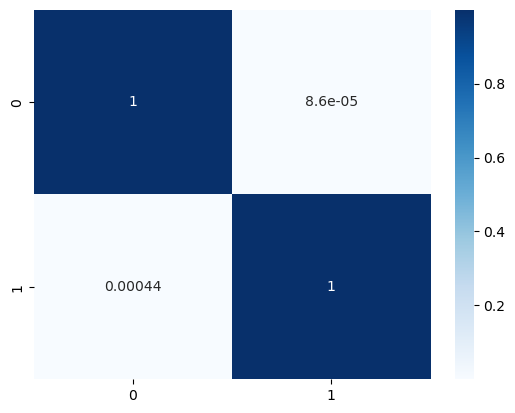

In [262]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

#### 4000 sample

In [263]:
X_train_sample, y_train_sample = spt.sample(4000)

X_train_sample.shape

(4000, 18)

The accuracy score is 0.8972545241206941
 The recall score is 0.8586031839063618
 The f1 score is 0.902429191975468
 The ROC AUC score is 0.8972929280970923

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89    104902
           1       0.86      0.95      0.90    104752

    accuracy                           0.90    209654
   macro avg       0.90      0.90      0.90    209654
weighted avg       0.90      0.90      0.90    209654


Cross validation score: [0.62499766 0.53999712 0.62499766 0.66       0.615     ]

Mean cross validation score: 0.6129984874905468



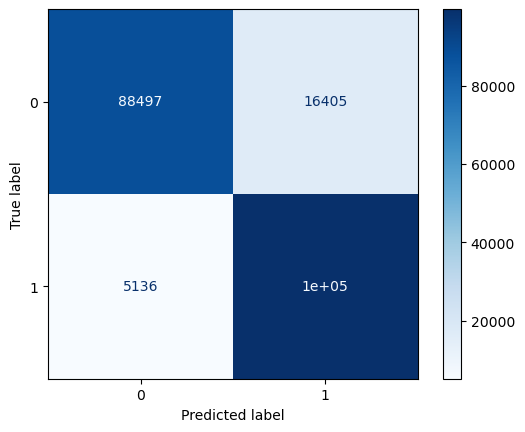

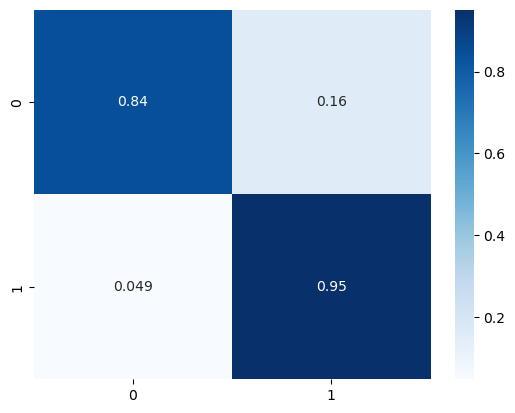

In [264]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9805966020204718
 The recall score is 0.9744947971648319
 The f1 score is 0.9807064804977994
 The ROC AUC score is 0.9806011786202474

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    104902
           1       0.97      0.99      0.98    104752

    accuracy                           0.98    209654
   macro avg       0.98      0.98      0.98    209654
weighted avg       0.98      0.98      0.98    209654


Cross validation score: [0.92499953 0.92499953 0.93999962 0.9        0.89      ]

Mean cross validation score: 0.9159997374983593



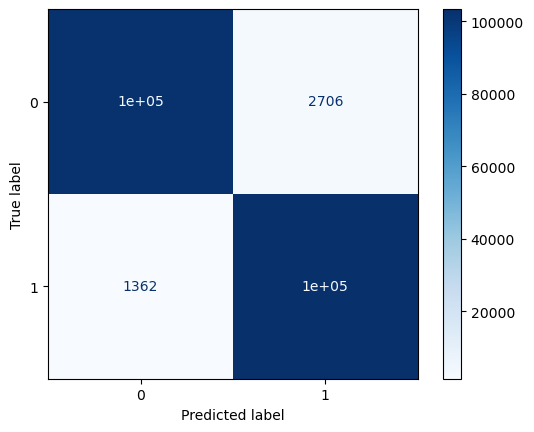

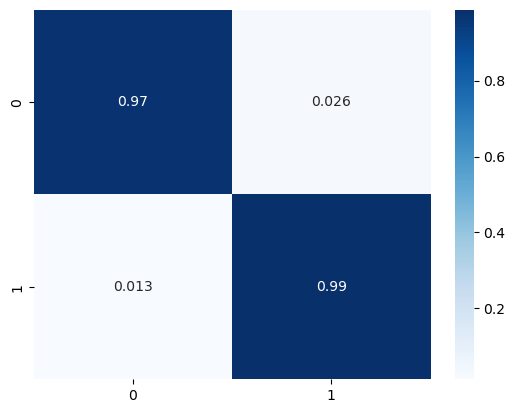

In [265]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9994705562498212
 The recall score is 0.9996275747476581
 The f1 score is 0.9994700937122561
 The ROC AUC score is 0.9994704433630589

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104902
           1       1.00      1.00      1.00    104752

    accuracy                           1.00    209654
   macro avg       1.00      1.00      1.00    209654
weighted avg       1.00      1.00      1.00    209654


Cross validation score: [1.         0.98999994 0.99499997 0.99       1.        ]

Mean cross validation score: 0.9949999812498828



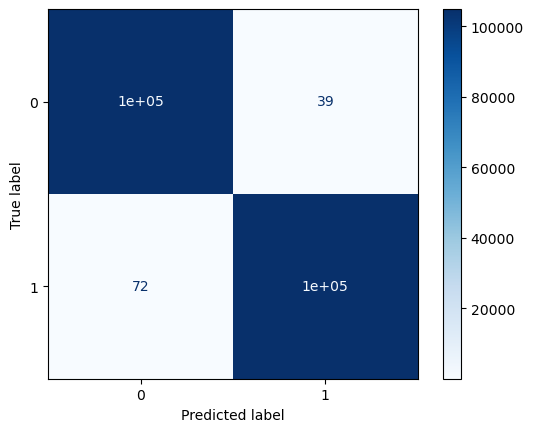

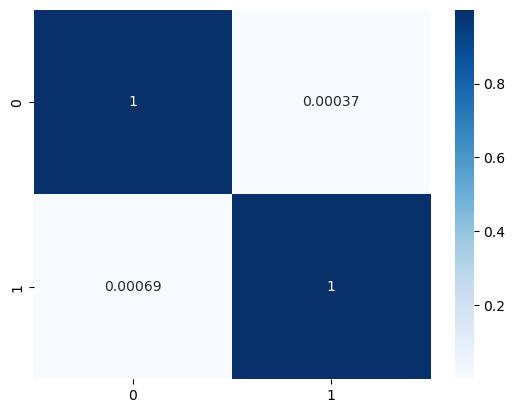

In [266]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

### Random Under Sample

In [267]:
# 18 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df = dp.OverallProcessor(df).rus()
df.shape

(106502, 19)

In [268]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(85201, 18)

#### 20,000 samples

In [269]:
X_train_sample, y_train_sample = spt.sample(20000)

X_train_sample.shape

(20000, 18)

The accuracy score is 0.9222102248720717
 The recall score is 0.8811991434689508
 The f1 score is 0.9254711464939505
 The ROC AUC score is 0.9226598245526892

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92     10743
           1       0.88      0.97      0.93     10558

    accuracy                           0.92     21301
   macro avg       0.93      0.92      0.92     21301
weighted avg       0.93      0.92      0.92     21301


Cross validation score: [0.65499784 0.68799805 0.67999872 0.64099856 0.66599866]

Mean cross validation score: 0.6659983683416255



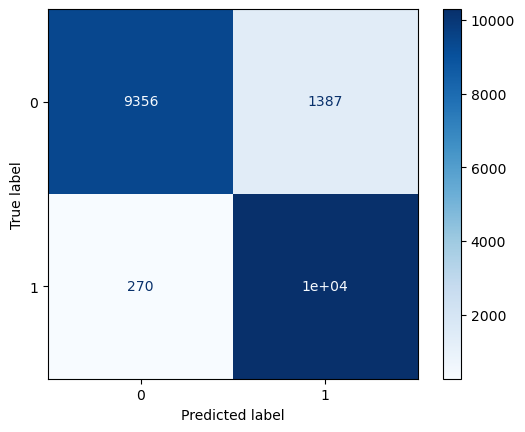

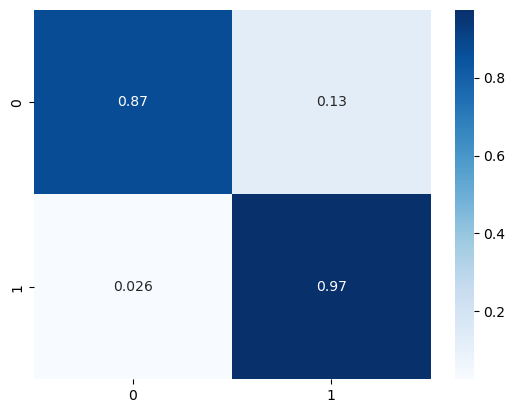

In [270]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9947420308905686
 The recall score is 0.9918079096045198
 The f1 score is 0.9947114930588347
 The ROC AUC score is 0.9947669153658156

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     10743
           1       0.99      1.00      0.99     10558

    accuracy                           0.99     21301
   macro avg       0.99      0.99      0.99     21301
weighted avg       0.99      0.99      0.99     21301


Cross validation score: [0.97799986 0.97899987 0.97999992 0.97199989 0.98599994]

Mean cross validation score: 0.9789998966494655



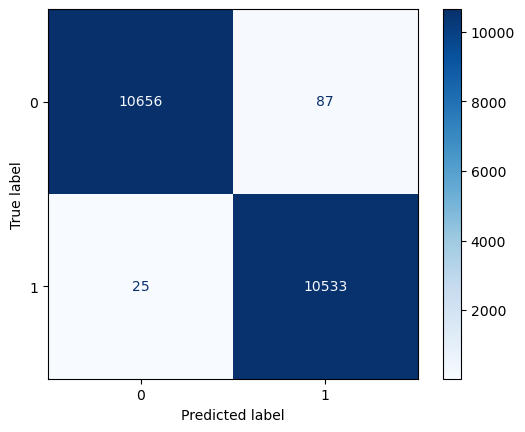

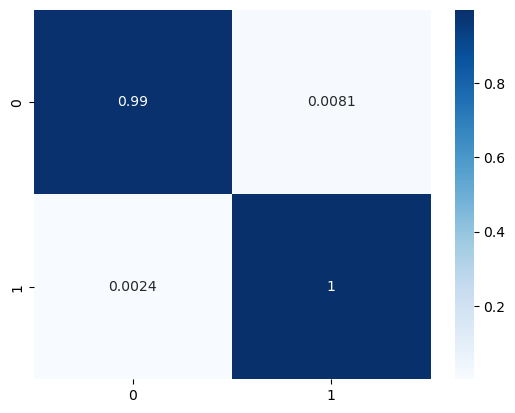

In [271]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9997183230834233
 The recall score is 0.9994320333207118
 The f1 score is 0.9997159359909099
 The ROC AUC score is 0.9997207483943032

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [0.99899999 0.99899999 1.         1.         0.999     ]

Mean cross validation score: 0.9993999966999813



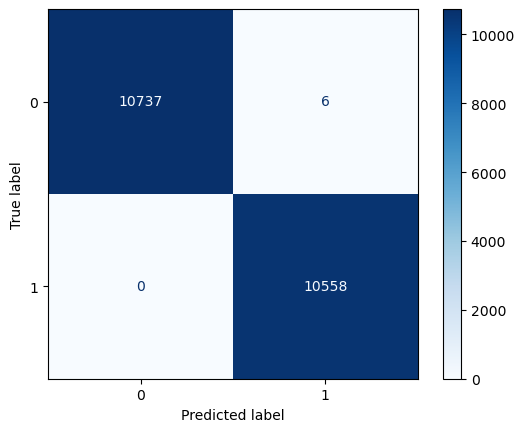

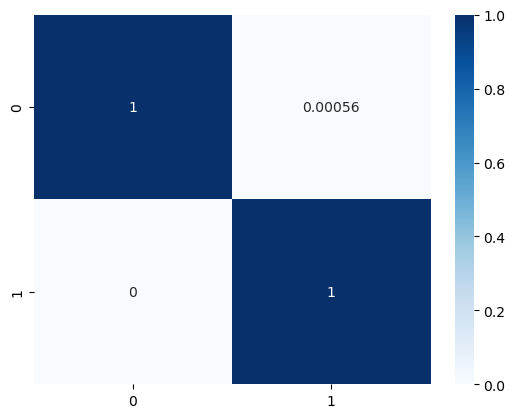

In [272]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

#### 4000 samples

In [273]:
X_train_sample, y_train_sample = spt.sample(4000)

X_train_sample.shape

(4000, 18)

The accuracy score is 0.8871883949110371
 The recall score is 0.8643552854972746
 The f1 score is 0.8895121614786887
 The ROC AUC score is 0.8874379969127332

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.86      0.88     10743
           1       0.86      0.92      0.89     10558

    accuracy                           0.89     21301
   macro avg       0.89      0.89      0.89     21301
weighted avg       0.89      0.89      0.89     21301


Cross validation score: [0.54999719 0.58999744 0.53999712 0.50499691 0.55      ]

Mean cross validation score: 0.5469977312358202



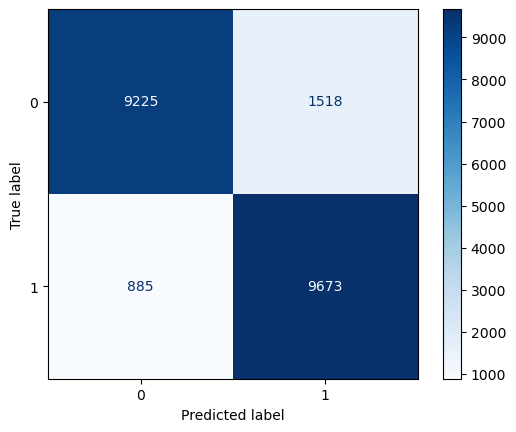

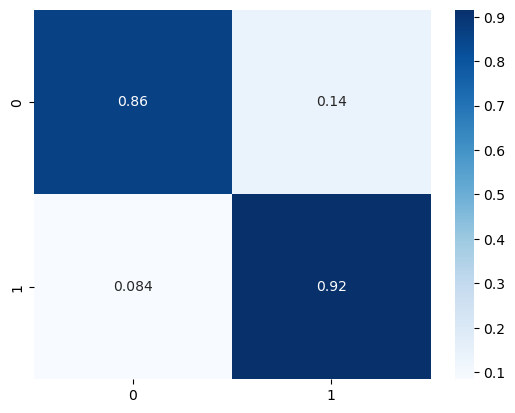

In [274]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.982629923477771
 The recall score is 0.9736842105263158
 The f1 score is 0.9826388888888888
 The ROC AUC score is 0.9827085340944662

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     10743
           1       0.97      0.99      0.98     10558

    accuracy                           0.98     21301
   macro avg       0.98      0.98      0.98     21301
weighted avg       0.98      0.98      0.98     21301


Cross validation score: [0.89499934 0.93999962 0.90499941 0.91499947 0.91      ]

Mean cross validation score: 0.9129995687473047



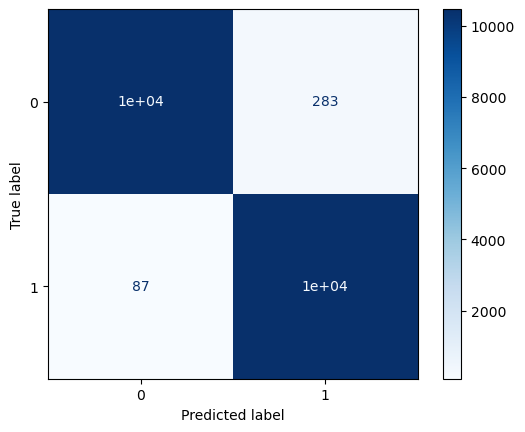

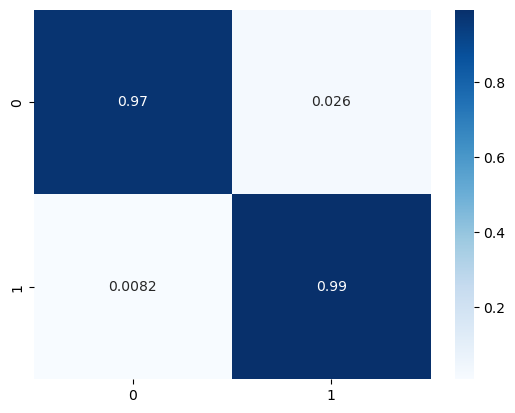

In [275]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9987794000281677
 The recall score is 0.9977315689981097
 The f1 score is 0.998769987699877
 The ROC AUC score is 0.9987882786690865

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10743
           1       1.00      1.00      1.00     10558

    accuracy                           1.00     21301
   macro avg       1.00      1.00      1.00     21301
weighted avg       1.00      1.00      1.00     21301


Cross validation score: [1.         0.98499991 0.98999994 1.         1.        ]

Mean cross validation score: 0.9949999687498046



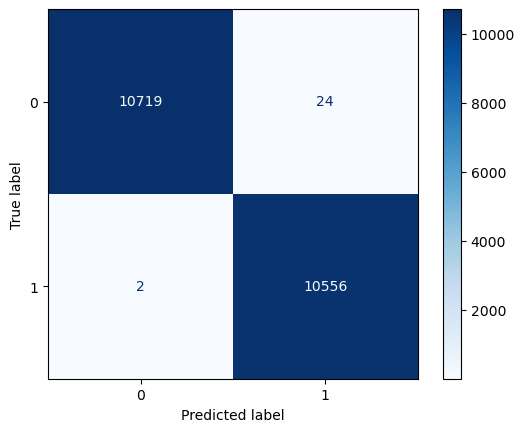

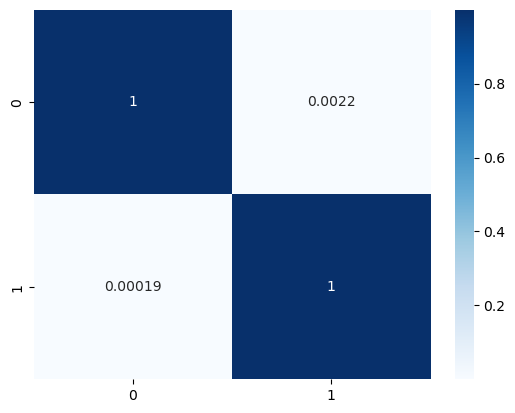

In [276]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

### Imbalanced

In [277]:
# 18 feature Columns

df= pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv')
df = dp.OverallProcessor(df).clean2()
df.shape

(578127, 19)

In [278]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(462501, 18)

#### 20,000 samples

In [279]:
X_train_sample, y_train_sample = spt.sample(20000)

X_train_sample.shape

(20000, 18)

The accuracy score is 0.6688720529984605
 The recall score is 0.21714682969718035
 The f1 score is 0.35681287482990914
 The ROC AUC score is 0.8176913700169515

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.64      0.78    105006
           1       0.22      1.00      0.36     10620

    accuracy                           0.67    115626
   macro avg       0.61      0.82      0.57    115626
weighted avg       0.93      0.67      0.74    115626


Cross validation score: [-3.04615974 -2.95338537 -2.89001962 -2.89001962 -2.97361175]

Mean cross validation score: -2.9506392209335384



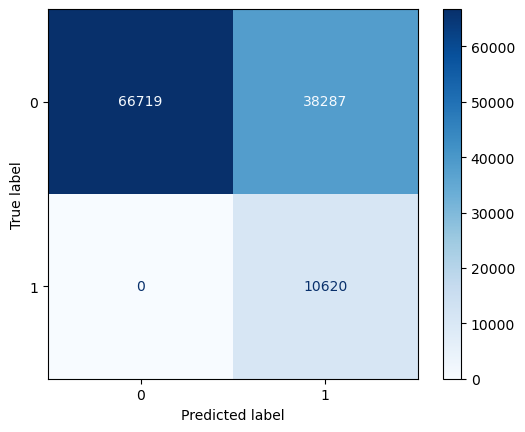

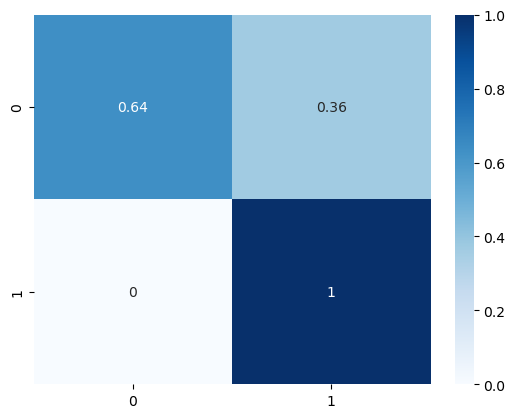

In [280]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9949232871499489
 The recall score is 0.9778984471753834
 The f1 score is 0.9722024908841218
 The ROC AUC score is 0.9821815535749315

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       0.98      0.97      0.97     10620

    accuracy                           0.99    115626
   macro avg       0.99      0.98      0.98    115626
weighted avg       0.99      0.99      0.99    115626


Cross validation score: [0.92218924 0.91321107 0.9193933  0.8925244  0.93133503]

Mean cross validation score: 0.9157306081103718



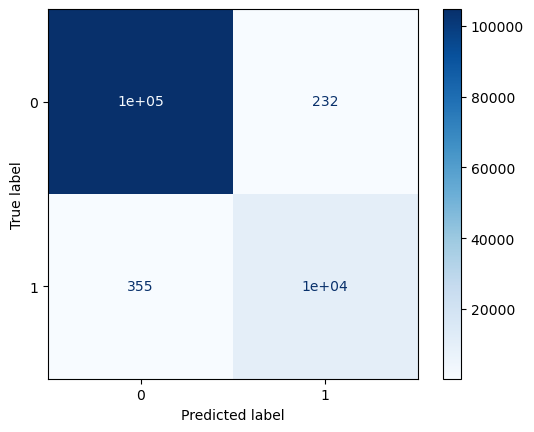

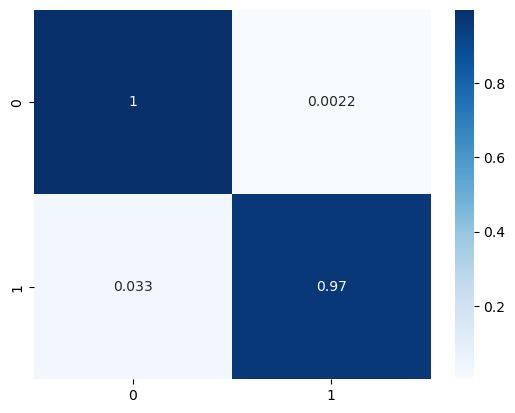

In [281]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9998443256706969
 The recall score is 0.9991525423728813
 The f1 score is 0.9991525423728813
 The ROC AUC score is 0.9995334164924232

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         0.98507283 0.99701457]

Mean cross validation score: 0.996417480010658



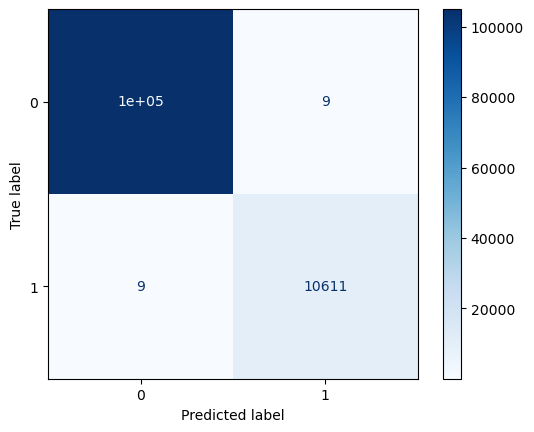

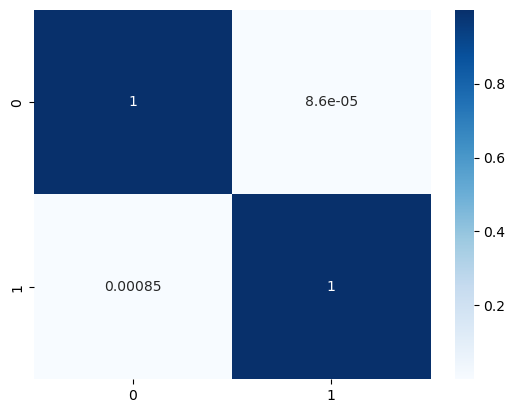

In [282]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

#### 4000 samples

In [283]:
X_train_sample, y_train_sample = spt.sample(4000)

X_train_sample.shape

(4000, 18)

The accuracy score is 0.67989898465743
 The recall score is 0.2229360880154531
 The f1 score is 0.3645790413404752
 The ROC AUC score is 0.8236778129761968

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.65      0.79    105006
           1       0.22      1.00      0.36     10620

    accuracy                           0.68    115626
   macro avg       0.61      0.82      0.58    115626
weighted avg       0.93      0.68      0.75    115626


Cross validation score: [-2.84390722 -2.81207654 -2.91631301 -2.82696746 -3.28858611]

Mean cross validation score: -2.937570067060407



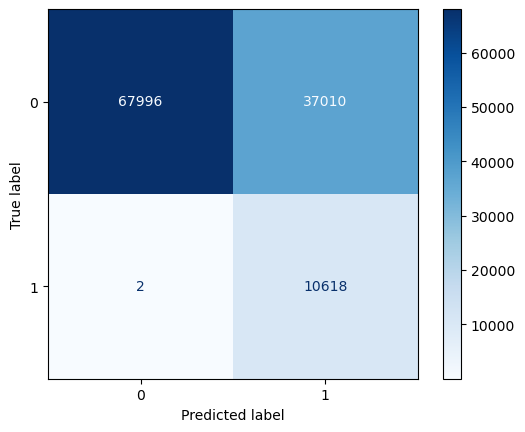

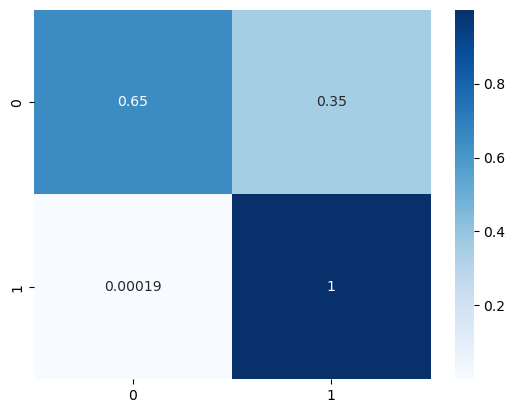

In [284]:
log_reg = dp.LogRegression(X_train_sample, X_test, y_train_sample, y_test)

log_reg.fit()

The accuracy score is 0.9770899278708941
 The recall score is 0.8763811502502598
 The f1 score is 0.8751001933141591
 The ROC AUC score is 0.9306785105957358

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    105006
           1       0.88      0.87      0.88     10620

    accuracy                           0.98    115626
   macro avg       0.93      0.93      0.93    115626
weighted avg       0.98      0.98      0.98    115626


Cross validation score: [0.65329464 0.6872906  0.67239967 0.67239967 0.52349043]

Mean cross validation score: 0.6417750033575146



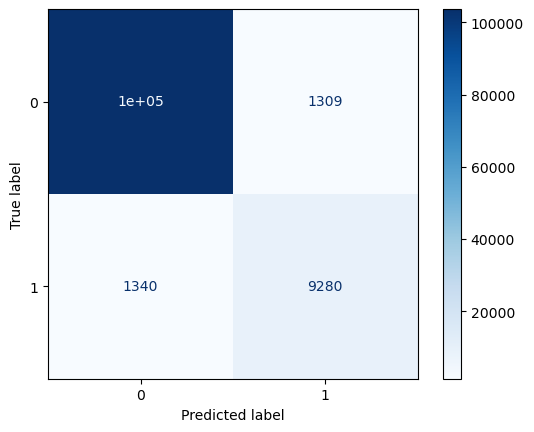

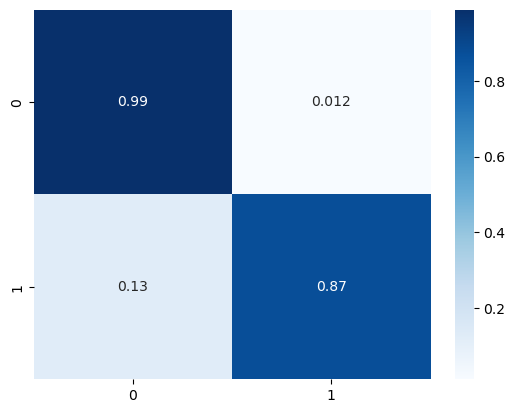

In [285]:
svm = dp.supportvm2(X_train_sample, X_test, y_train_sample, y_test)

svm.fit()

The accuracy score is 0.9996713541936935
 The recall score is 0.9992451405925646
 The f1 score is 0.9982090677726458
 The ROC AUC score is 0.9985494775601199

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    105006
           1       1.00      1.00      1.00     10620

    accuracy                           1.00    115626
   macro avg       1.00      1.00      1.00    115626
weighted avg       1.00      1.00      1.00    115626


Cross validation score: [1.         1.         1.         0.95532723 0.98510908]

Mean cross validation score: 0.9880872608145335



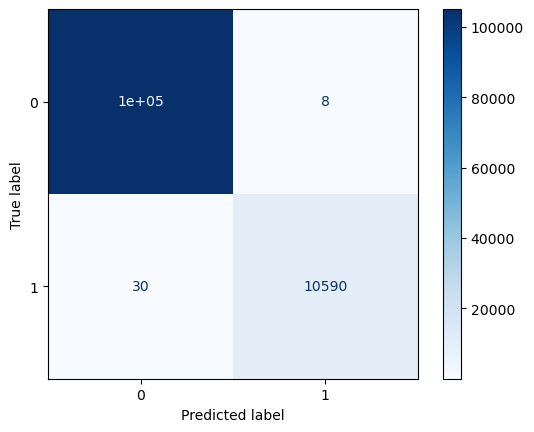

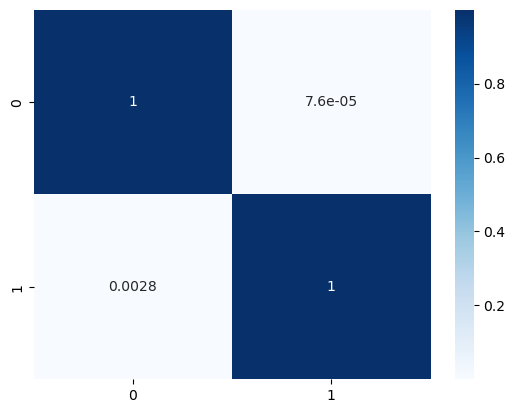

In [286]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()

## Random Forest Feature Selection

### SMOTE

#### Reduction

In [3]:
df = pd.read_csv('/Volumes/Maestria/Maestria/Programs/Machine Learning/Proyecto/neo_data_copy1.csv') 
df = dp.OverallProcessor(df).clean2()
df = dp.OverallProcessor(df).smote()
df.shape

(1049752, 19)

In [4]:
spt = dp.scalesplit(df)

X_train, X_test, y_train, y_test = spt.ttsplit()

X_train.shape

(839801, 18)

In [11]:
df1 = df.drop(columns=['is_hazardous'])

xtpd = pd.DataFrame(X_test, columns=df1.columns)
xpd = pd.DataFrame(X_train, columns = df1.columns)
ypd = pd.DataFrame(y_train, columns = ['is_hazardous'])

zpd = pd.concat([xpd, ypd], axis = 1)
zpd

,absolute_magnitude_h,relative_velocity.kilometers_per_hour,miss_distance.kilometers,estimated_diameter_min,estimated_diameter_max,orbit_uncertainty,minimum_orbit_intersection,jupiter_tisserand_invariant,eccentricity,semi_major_axis,inclination,ascending_node_longitude,perihelion_distance,perihelion_argument,aphelion_distance,perihelion_time,mean_anomaly,estimated_diameter_average,is_hazardous
0,-1.324807,1.419934,-0.099110,-0.961593,1.453405,-1.523332,1.102642,1.338306,2.134211,1.629591,0.331265,-0.271922,1.332452,-0.826409,-0.724028,0.778568,0.778568,0.778568,0
1,-0.654360,0.241261,0.146027,-0.215514,-0.463397,-1.333361,0.545531,1.309949,0.483444,1.152751,1.306693,1.852737,1.115430,-1.123794,-0.388255,0.028072,0.028072,0.028072,1
2,-1.012400,-0.005020,0.023431,0.903606,3.713997,-1.632228,0.829790,1.981525,1.133256,-0.237565,1.552924,-0.797097,1.768696,1.972939,0.372200,0.347218,0.347218,0.347218,0
3,-0.124322,0.137361,0.548860,0.903606,0.291221,-0.005948,-1.446792,-0.224416,0.029451,0.457121,1.402942,-1.561213,-0.503700,0.806129,0.287201,-0.238673,-0.238673,-0.238673,0
4,-0.455367,0.787129,-0.873196,0.036706,-0.276029,-0.863401,1.246198,0.714784,0.041443,0.769246,-0.728730,0.933009,0.885691,0.084563,0.253409,-0.094212,-0.094212,-0.094212,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839796,1.399101,-0.823817,-0.889431,1.649686,-0.643910,0.738038,-0.999337,-0.632027,-0.598487,-0.733743,0.106952,0.792692,-0.679877,0.206310,1.764338,-0.468243,-0.468243,-0.468243,0
839797,-0.015506,0.328700,-0.675730,0.903606,1.056445,0.343789,0.552542,-0.490904,-0.223842,0.572750,-0.990866,1.582237,-0.321700,0.759930,0.058111,-0.274003,-0.274003,-0.274003,0
839798,0.205636,0.380503,-0.698345,1.276646,0.617162,0.483684,0.711828,-0.570711,0.222725,-0.027890,-1.228106,1.015725,-0.359365,0.619996,0.393539,-0.331981,-0.331981,-0.331981,0
839799,-0.285884,-0.430384,-0.624181,-0.441296,-0.437858,-0.572924,0.623229,0.669675,-0.401079,0.343198,-0.048216,-0.116974,0.707864,-0.507376,-0.917661,-0.167360,-0.167360,-0.167360,1


In [8]:
rnd_clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rnd_clf.fit(xpd, ypd)

pred = rnd_clf.predict(X_test)
print(f'F1 score: {f1_score(pred, y_test, average="weighted")}')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


F1 score: 0.9999857109515524


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [9]:
rnd_clf.feature_importances_

array([0.10803846, 0.0027908 , 0.00079022, 0.05153826, 0.33890155,
       0.00353676, 0.00596942, 0.00503344, 0.00433103, 0.00144207,
       0.03007367, 0.00610733, 0.00668739, 0.0008644 , 0.00064748,
       0.10981544, 0.16367963, 0.15975267])

In [10]:
feature_importances = {name: score for name, score in zip(list(df1), rnd_clf.feature_importances_)}

feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

feature_importances_sorted.head(10)

estimated_diameter_max        0.338902
mean_anomaly                  0.163680
estimated_diameter_average    0.159753
perihelion_time               0.109815
absolute_magnitude_h          0.108038
estimated_diameter_min        0.051538
inclination                   0.030074
perihelion_distance           0.006687
ascending_node_longitude      0.006107
minimum_orbit_intersection    0.005969
dtype: float64

In [13]:
columns = list(feature_importances_sorted.head(10).index)
columns

['estimated_diameter_max',
 'mean_anomaly',
 'estimated_diameter_average',
 'perihelion_time',
 'absolute_magnitude_h',
 'estimated_diameter_min',
 'inclination',
 'perihelion_distance',
 'ascending_node_longitude',
 'minimum_orbit_intersection']

In [14]:
X_train_reduced = xpd[columns].copy()
X_test_reduced = xtpd[columns].copy()

The accuracy score is 0.9362898962138785
 The recall score is 0.8870069860363747
 The f1 score is 0.9401205110528154
 The ROC AUC score is 0.9362732019666883

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.87      0.93    104948
           1       0.89      1.00      0.94    105003

    accuracy                           0.94    209951
   macro avg       0.94      0.94      0.94    209951
weighted avg       0.94      0.94      0.94    209951


Cross validation score: [0.74627443 0.74598714 0.74682067 0.74939271 0.74746368]

Mean cross validation score: 0.7471877266115526



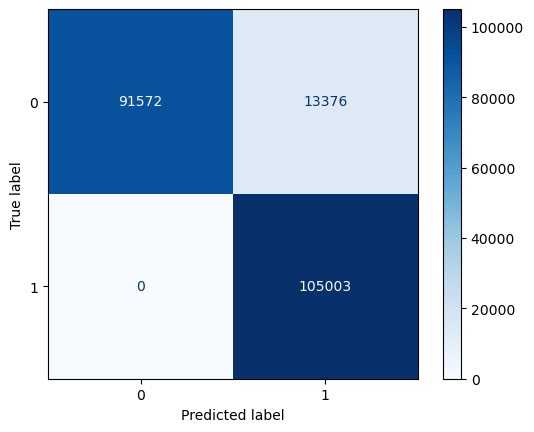

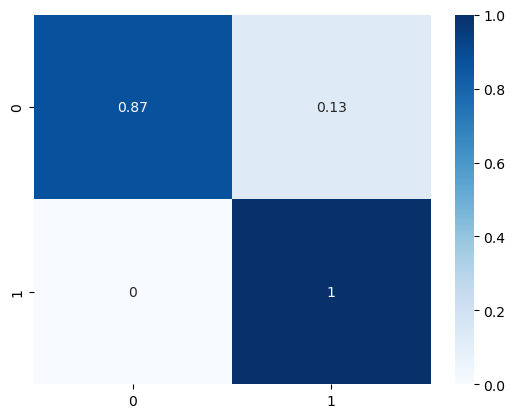

In [15]:
log_reg = dp.LogRegression(X_train_reduced, X_test_reduced, y_train, y_test)

log_reg.fit()

In [ ]:
svm = dp.supportvm2(X_train_reduced, X_test_reduced, y_train, y_test)

svm.fit()

The accuracy score is 0.9999666588870737
 The recall score is 0.9999619062130967
 The f1 score is 0.9999666677777408
 The ROC AUC score is 0.9999666576370377

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    104948
           1       1.00      1.00      1.00    105003

    accuracy                           1.00    209951
   macro avg       1.00      1.00      1.00    209951
weighted avg       1.00      1.00      1.00    209951




In [ ]:
random_forest = dp.RandomForest(X_train_sample, X_test, y_train_sample, y_test)

random_forest.fit()

In [ ]:
xgboost = dp.xgbClassifier(X_train_sample, X_test, y_train_sample, y_test)

xgboost.fit()

In [ ]:
gb = dp.GradientBoost(X_train_sample, X_test, y_train_sample, y_test)

gb.fit()

In [ ]:
ada = dp.AdaBoost(X_train_sample, X_test, y_train_sample, y_test)

ada.fit()

In [ ]:
ngb = dp.ngboost(X_train_sample, X_test, y_train_sample, y_test)

ngb.fit()